# Исследование данных магазина для увеличения покупательской активности

**Цель исследования** -  разработать модель, чтобы удерживать активность постоянных клиентов.

**Задача:**

1. Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**План исследования:**
1. Изучить данные;
2. Предобработка данных;
3. Исследовательский анализ данных;
4. Объединение данных;
5. Корреляционный анализ;
6. Обучение модели;
7. Анализ важности признаков;
8. Сегментация покупателей;
9. Сделать общий вывод.

**Согласно документации к данным:**

Таблица `market_file` содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении:

- `id` — номер покупателя в корпоративной базе данных.
- `Покупательская активность` — рассчитанный класс покупательской активности: «снизилась» или «прежний уровень».
- `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
- `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
- `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
- `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
- `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
- `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

Таблица `market_money` содержит данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом:

- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксирована выручка.
- `Выручка` — сумма выручки за период.

Таблица `market_time` содержит данные о времени (в минутах), которое покупатель провёл на сайте в течение периода:

- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксировано общее время.
- `минут` — значение времени, проведённого на сайте, в минутах.

Таблица `money` содержит данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю:

- `id` — номер покупателя в корпоративной базе данных.
- `Прибыль` — значение прибыли.

## Изучение данных.

### Импорт библиотек

In [1]:
import os
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Загружаем классы для работы с пайплайнами
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Импортируем для машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import (
    OneHotEncoder, StandardScaler, MinMaxScaler)
from sklearn.impute import SimpleImputer

# Импортируем метрики для оценки качества модели
from sklearn.metrics import roc_auc_score

# Импортируем сторонние библиотеки
import shap
import phik

from phik.report import plot_correlation_matrix

In [ ]:
# Для игнорирования предупреждений
warnings.simplefilter('ignore', FutureWarning)

### Константы

In [2]:
# Задаем константу для деления датасета на одинаковые выборки
RANDOM_STATE = 42

# Задаем константу для деления датасета на выборки
TEST_SIZE = 0.25

### Загрузка данных

Прочитаем файлы `market_file.csv`, `market_money.csv`, `market_time.csv` и `money.csv` и сохраним их в переменные `market_file`, `market_money`, `market_time` и `money`.

In [3]:
pth1 = r"C:\Users\stepa\Downloads\market_file.csv"
pth2 = r"C:\Users\stepa\Downloads\market_money.csv"
pth3 = r"C:\Users\stepa\Downloads\market_time.csv"
pth4 = r"C:\Users\stepa\Downloads\money.csv"

In [4]:
if os.path.exists(pth1):
    market_file = pd.read_csv(pth1)
else:
    print('Ошибка')

In [5]:
if os.path.exists(pth2):
    market_money = pd.read_csv(pth2)
else:
    print('Ошибка')

In [6]:
if os.path.exists(pth3):
    market_time = pd.read_csv(pth3)
else:
    print('Ошибка')

In [7]:
if os.path.exists(pth4):
    money = pd.read_csv(pth4, sep=';')
else:
    print('Ошибка')

Выведем первые 5 строк всех таблиц

In [8]:
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [9]:
market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [10]:
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [11]:
money.head()

,id,Прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"


Посмотрим на общую информацию о данных в таблицах

In [12]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

Рассмотрим полученную информацию подробнее.

Всего в таблице 13 столбцов, тип данных - `int`(7), `object`(4), `float`(2).
Количество значений в столбцах одинаковое, а значит пропусков нет.
Название столбцов `Покупательская активность`, `Тип сервиса`, `Разрешить сообщать` не соответствует стилю.

In [13]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


Рассмотрим полученную информацию подробнее.

Всего в таблице 3 столбца, тип данных - `int`(1), `object`(1), `float`(1).
Количество значений в столбцах одинаковое, а значит пропусков нет.
Название столбцов соответствует стилю.

In [14]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


Рассмотрим полученную информацию подробнее.

Всего в таблице 3 столбца, тип данных - `int`(2), `object`(1).
Количество значений в столбцах одинаковое, а значит пропусков нет.
В столбце `минут` сделаем первую букву прописной для единого стиля всех таблиц

In [15]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   Прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


Рассмотрим полученную информацию подробнее.

Всего в таблице 2 столбца, тип данных - `int`(1), `object`(1).
Количество значений в столбцах одинаковое, а значит пропусков нет.
Название столбцов соответствует стилю. В столбце `Прибыль` необходимо сменить тип данных на `float`.

### Вывод.

Каждая строка таблиц содержит информацию о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении,  о выручке, о времени и о среднемесячной прибыли покупателя. Есть несколько проблем и их можно решить следующим образом:
1. Переименовать название столбцов в `market_file`:
    - `Покупательская_активность`, 
    - `Тип_сервиса`, 
    - `Разрешить_сообщать`.    
2. На всякий случай проверить пропуски в данных.
3. Сделать проверку на явные и неявные дубликаты.
4. Необходимо изменить тип данных в таблице `money` в столбце `Прибыль` с `object` на `float`.

## Предобработка данных.
### Работа с названиями столбцов.

Переименуем столбцы в таблице `market_file`:

- `Покупательская активность`, 
- `Тип сервиса`, 
- `Разрешить сообщать`.

In [16]:
market_file = market_file.rename(columns={'Покупательская активность': 'Покупательская_активность',
                                          'Тип сервиса': 'Тип_сервиса',
                                          'Разрешить сообщать': 'Разрешить_сообщать'})  # Переименовываем столбцы

In [17]:
market_file.columns  # Проверка результатов

Index(['id', 'Покупательская_активность', 'Тип_сервиса', 'Разрешить_сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')

In [18]:
market_time = market_time.rename(
    columns={'минут': 'Минут'})  # Переименовываем столбец

In [19]:
market_time.columns

Index(['id', 'Период', 'Минут'], dtype='object')

### Работа с пропусками.

Хоть этап изучения данных показал, что пропусков нет, но необходимо в этом удостоверится, поэтому проверим все таблицы на наличие пропусков.

In [20]:
market_file.isna().sum()

id                                     0
Покупательская_активность              0
Тип_сервиса                            0
Разрешить_сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64

In [21]:
market_money.isna().sum()

id         0
Период     0
Выручка    0
dtype: int64

In [22]:
market_time.isna().sum()

id        0
Период    0
Минут     0
dtype: int64

In [23]:
money.isna().sum()

id         0
Прибыль    0
dtype: int64

В датафреймах пропусков не обнаружено

### Работа с явными дубликатами.

Сделаем проверку на явные дубликаты во всех таблицах.

In [24]:
market_file.duplicated().sum()  # Проверяем количество явных дубликатов

0

In [25]:
market_money.duplicated().sum()  # Проверяем количество явных дубликатов

0

In [26]:
market_time.duplicated().sum()  # Проверяем количество явных дубликатов

0

In [27]:
money.duplicated().sum()  # Проверяем количество явных дубликатов

0

Во всех таблицах явных дубликатов не обнаружено.

### Работа с неявными дубликатами.

Предположим, что в таблице `market_file` в столбцах, имеющие строковый тип данных, одно и то же значение переменной может быть написано по-разному, то есть проверим столбцы:

- `Покупательская_активность`;
- `Тип_сервиса`;
- `Разрешить_сообщать`;
- `Популярная_категория`.

In [28]:
# Считаем количество уникальных значений
market_buy_activ = market_file['Покупательская_активность'].value_counts()
market_buy_activ

Покупательская_активность
Прежний уровень    802
Снизилась          498
Name: count, dtype: int64

In [29]:
# Считаем количество уникальных значений
market_file['Тип_сервиса'].value_counts()

Тип_сервиса
стандарт     914
премиум      376
стандартт     10
Name: count, dtype: int64

Так как нет никакой информации, о том, что в сервисе есть два вида стандарта, то считаем их неявными дубликатами.

In [30]:
market_file['Тип_сервиса'] = market_file['Тип_сервиса'].replace(
    'стандартт', 'стандарт')

Еще раз сделаем проверку

In [31]:
# Считаем количество уникальных значений
market_type_service = market_file['Тип_сервиса'].value_counts()
market_type_service

Тип_сервиса
стандарт    924
премиум     376
Name: count, dtype: int64

In [32]:
# Считаем количество уникальных значений
market_reporting = market_file['Разрешить_сообщать'].value_counts()
market_reporting

Разрешить_сообщать
да     962
нет    338
Name: count, dtype: int64

In [33]:
# Считаем количество уникальных значений
market_popular_cat = market_file['Популярная_категория'].value_counts()
market_popular_cat

Популярная_категория
Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: count, dtype: int64

Больше неявных дубликатов обнаружено не было.

В таблицах `market_money` и `market_time` также проверим столбцы со строковыми значениями.

In [34]:
market_money['Период'].value_counts()  # Считаем количество уникальных значений

Период
препредыдущий_месяц    1300
текущий_месяц          1300
предыдущий_месяц       1300
Name: count, dtype: int64

Так как информации за какой период у нас данные не известно, то под `препредыдущий_месяц` скорее всего имеется пред предыдущий месяц, поэтому заменим для удобства.

In [35]:
market_money['Период'] = market_money['Период'].replace(
    'препредыдущий_месяц', 'пред_предыдущий_месяц')

Еще раз сделаем проверку

In [36]:
# Считаем количество уникальных значений
market_momey_period = market_money['Период'].value_counts()
market_momey_period

Период
пред_предыдущий_месяц    1300
текущий_месяц            1300
предыдущий_месяц         1300
Name: count, dtype: int64

In [37]:
market_time['Период'].value_counts()  # Считаем количество уникальных значений

Период
текущий_месяц       1300
предыдцщий_месяц    1300
Name: count, dtype: int64

Исправим ошибку в написании `предыдцщий_месяц`.

In [38]:
market_time['Период'] = market_time['Период'].replace(
    'предыдцщий_месяц', 'предыдущий_месяц')

Еще раз сделаем проверку

In [39]:
# Считаем количество уникальных значений
market_time_period = market_time['Период'].value_counts()
market_time_period

Период
текущий_месяц       1300
предыдущий_месяц    1300
Name: count, dtype: int64

### Изменение типов данных.

Необходимо изменить тип данных в таблице `money` в столбце `Прибыль`. 

Но для начала необходимо поменять записи в этих столбцах, а именно вместо `,` сделать `.`.

In [40]:
# Делаем замену , на .
money['Прибыль'] = money['Прибыль'].str.replace(',', '.')

Теперь изменим тип данных

In [41]:
money['Прибыль'] = money['Прибыль'].astype(
    'float')  # Меняем тип данных на float

Сделаем проверку

In [42]:
money.dtypes

id           int64
Прибыль    float64
dtype: object

### Вывод.

На данном этапе были сделаны следующие действия:

1. Переименовали столбцы в таблице `market_file`:

- `Покупательская активность` на `Покупательская_активность`,
- `Тип сервиса` на `Тип_сервиса`,
- `Разрешить сообщать` на `Разрешить_сообщать`.

2. Переименовали столбец в таблице `market_time`:

- `минут` на `Минут`.

3. Сделали проверку на пропуски - **не обнаружены**.
4. Сделали проверку на явные дубликаты - **не обнаружены**.
5. Сделали проверку на неявные дубликаты:
    - В таблице `market_file` в столбце `Тип_сервиса` заменили `стандартт` на `стандарт`;
    - В таблице `market_money` в столбце `Период` исправили ошибку написания `препредыдущий_месяц` на `пред_предыдущий_месяц`;
    - В таблице `market_time` в столбце `Период` исправили ошибку написания `предыдцщий_месяц` на `предыдущий_месяц`.
6. Изменили тип данных в таблице `money` в столбце `Прибыль` с `object` на `float`.

## Исследовательский анализ данных.

Исследуем данные в датафрейме `market_file`:
- Выясним процентное соотношение уровней сервиса, покупательской активности, о разрешении сообщать дополнительные предложения и популярные категории,
- Изучим количественные переменные,
- выясним как зависит уровень сервиса от покупательской активности,
- выясним как зависит уровень сервиса от разрешения сообщать,
- выясним как зависит уровень сервиса от текущий активности,
- выясним как зависит уровень сервиса от активности за 6 месяцев,
- выясним как зависит уровень сервиса от момента регистрации,
- выясним как зависит уровень сервиса от числа сбоев,
- выясним как зависит уровень сервиса от количества страниц за 1 визит,
- выясним как зависит уровень сервиса от числа неоплаченных товаров,
- выясним как зависит уровень сервиса от числа просмотренных категорий,
- выясним как зависит уровень сервиса от покупок от акций.

Исследуем данные в датафрейме `market_money`:
- Выясним процентное соотношение периодов,
- Изучим количественные переменные,
- Выясним зависимость выручки от периода.

Исследуем данные в датафрейме `market_time`:
- Выясним процентное соотношение периодов,
- Изучим количественные переменные,
- Выясним зависимость минут от периода.

Исследуем данные в датафрейме `momey`.

### Исследуем датафрейм `market_file` для всех клиентов

Начнем с анализа таблицы `market_file` и построим круговые диаграммы.

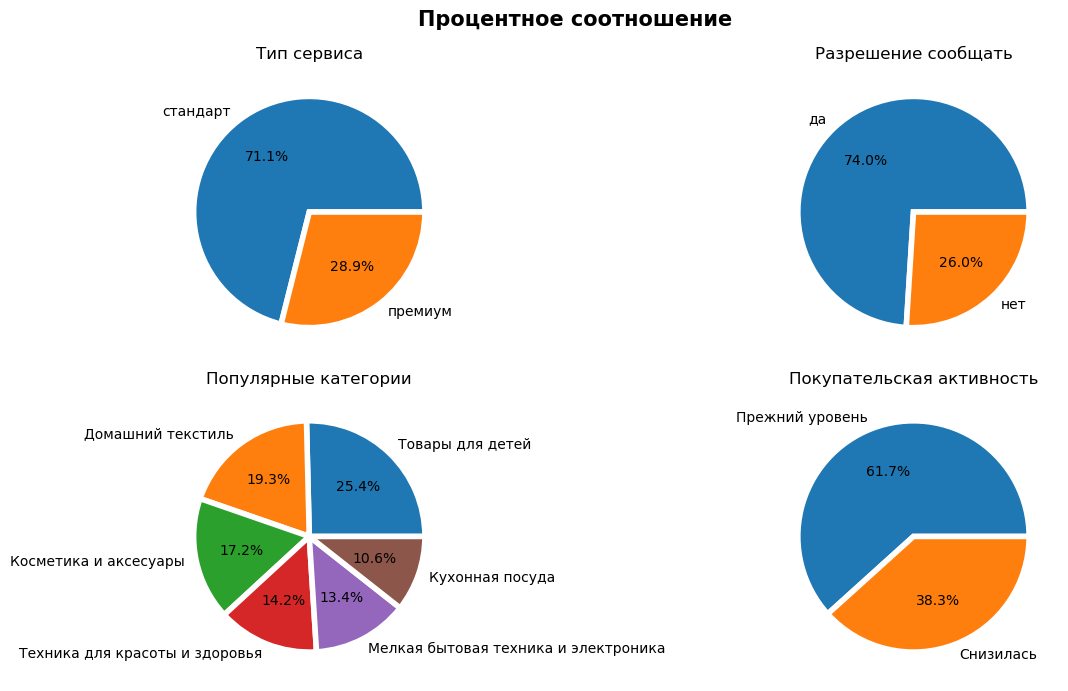

In [43]:
plt.figure(figsize=(12, 7))

plt.suptitle('Процентное соотношение', fontsize=15, fontweight='bold')

plt.subplot(2, 2, 1)
plt.pie(market_type_service.values, 
        labels=market_type_service.index, 
        wedgeprops={'linewidth':4, 'edgecolor':'white'}, 
        autopct='%.1f%%')
plt.title('Тип сервиса')

plt.subplot(2, 2, 2)
plt.pie(market_reporting.values, 
        labels=market_reporting.index, 
        wedgeprops={'linewidth':4, 'edgecolor':'white'}, 
        autopct='%.1f%%')
plt.title('Разрешение сообщать')

plt.subplot(2, 2, 3)
plt.pie(market_popular_cat.values, 
        labels=market_popular_cat.index, 
        wedgeprops={'linewidth':4, 'edgecolor':'white'}, 
        autopct='%.1f%%')
plt.title('Популярные категории')

plt.subplot(2, 2, 4)
plt.pie(market_buy_activ.values, 
        labels=market_buy_activ.index, 
        wedgeprops={'linewidth':4, 'edgecolor':'white'}, 
        autopct='%.1f%%')
plt.title('Покупательская активность')

plt.tight_layout()
plt.show()

Выделим следующие пункты:
- На маркете преобладают пользователи со стандартным уровнем.
- В маркете `74%` пользователей разрешила присылать покупателю дополнительные предложения о товаре.
- Самая популярная категория на маркете это товары для детей - `25.4%`, наименее популярная - кухонная посуда, `10.6%`
- Среди `61.7%` пользователей маркета сохранилась прежняя покупательская активность.

Изучим количественные переменные в датафрейме и начнем с диаграммы размаха

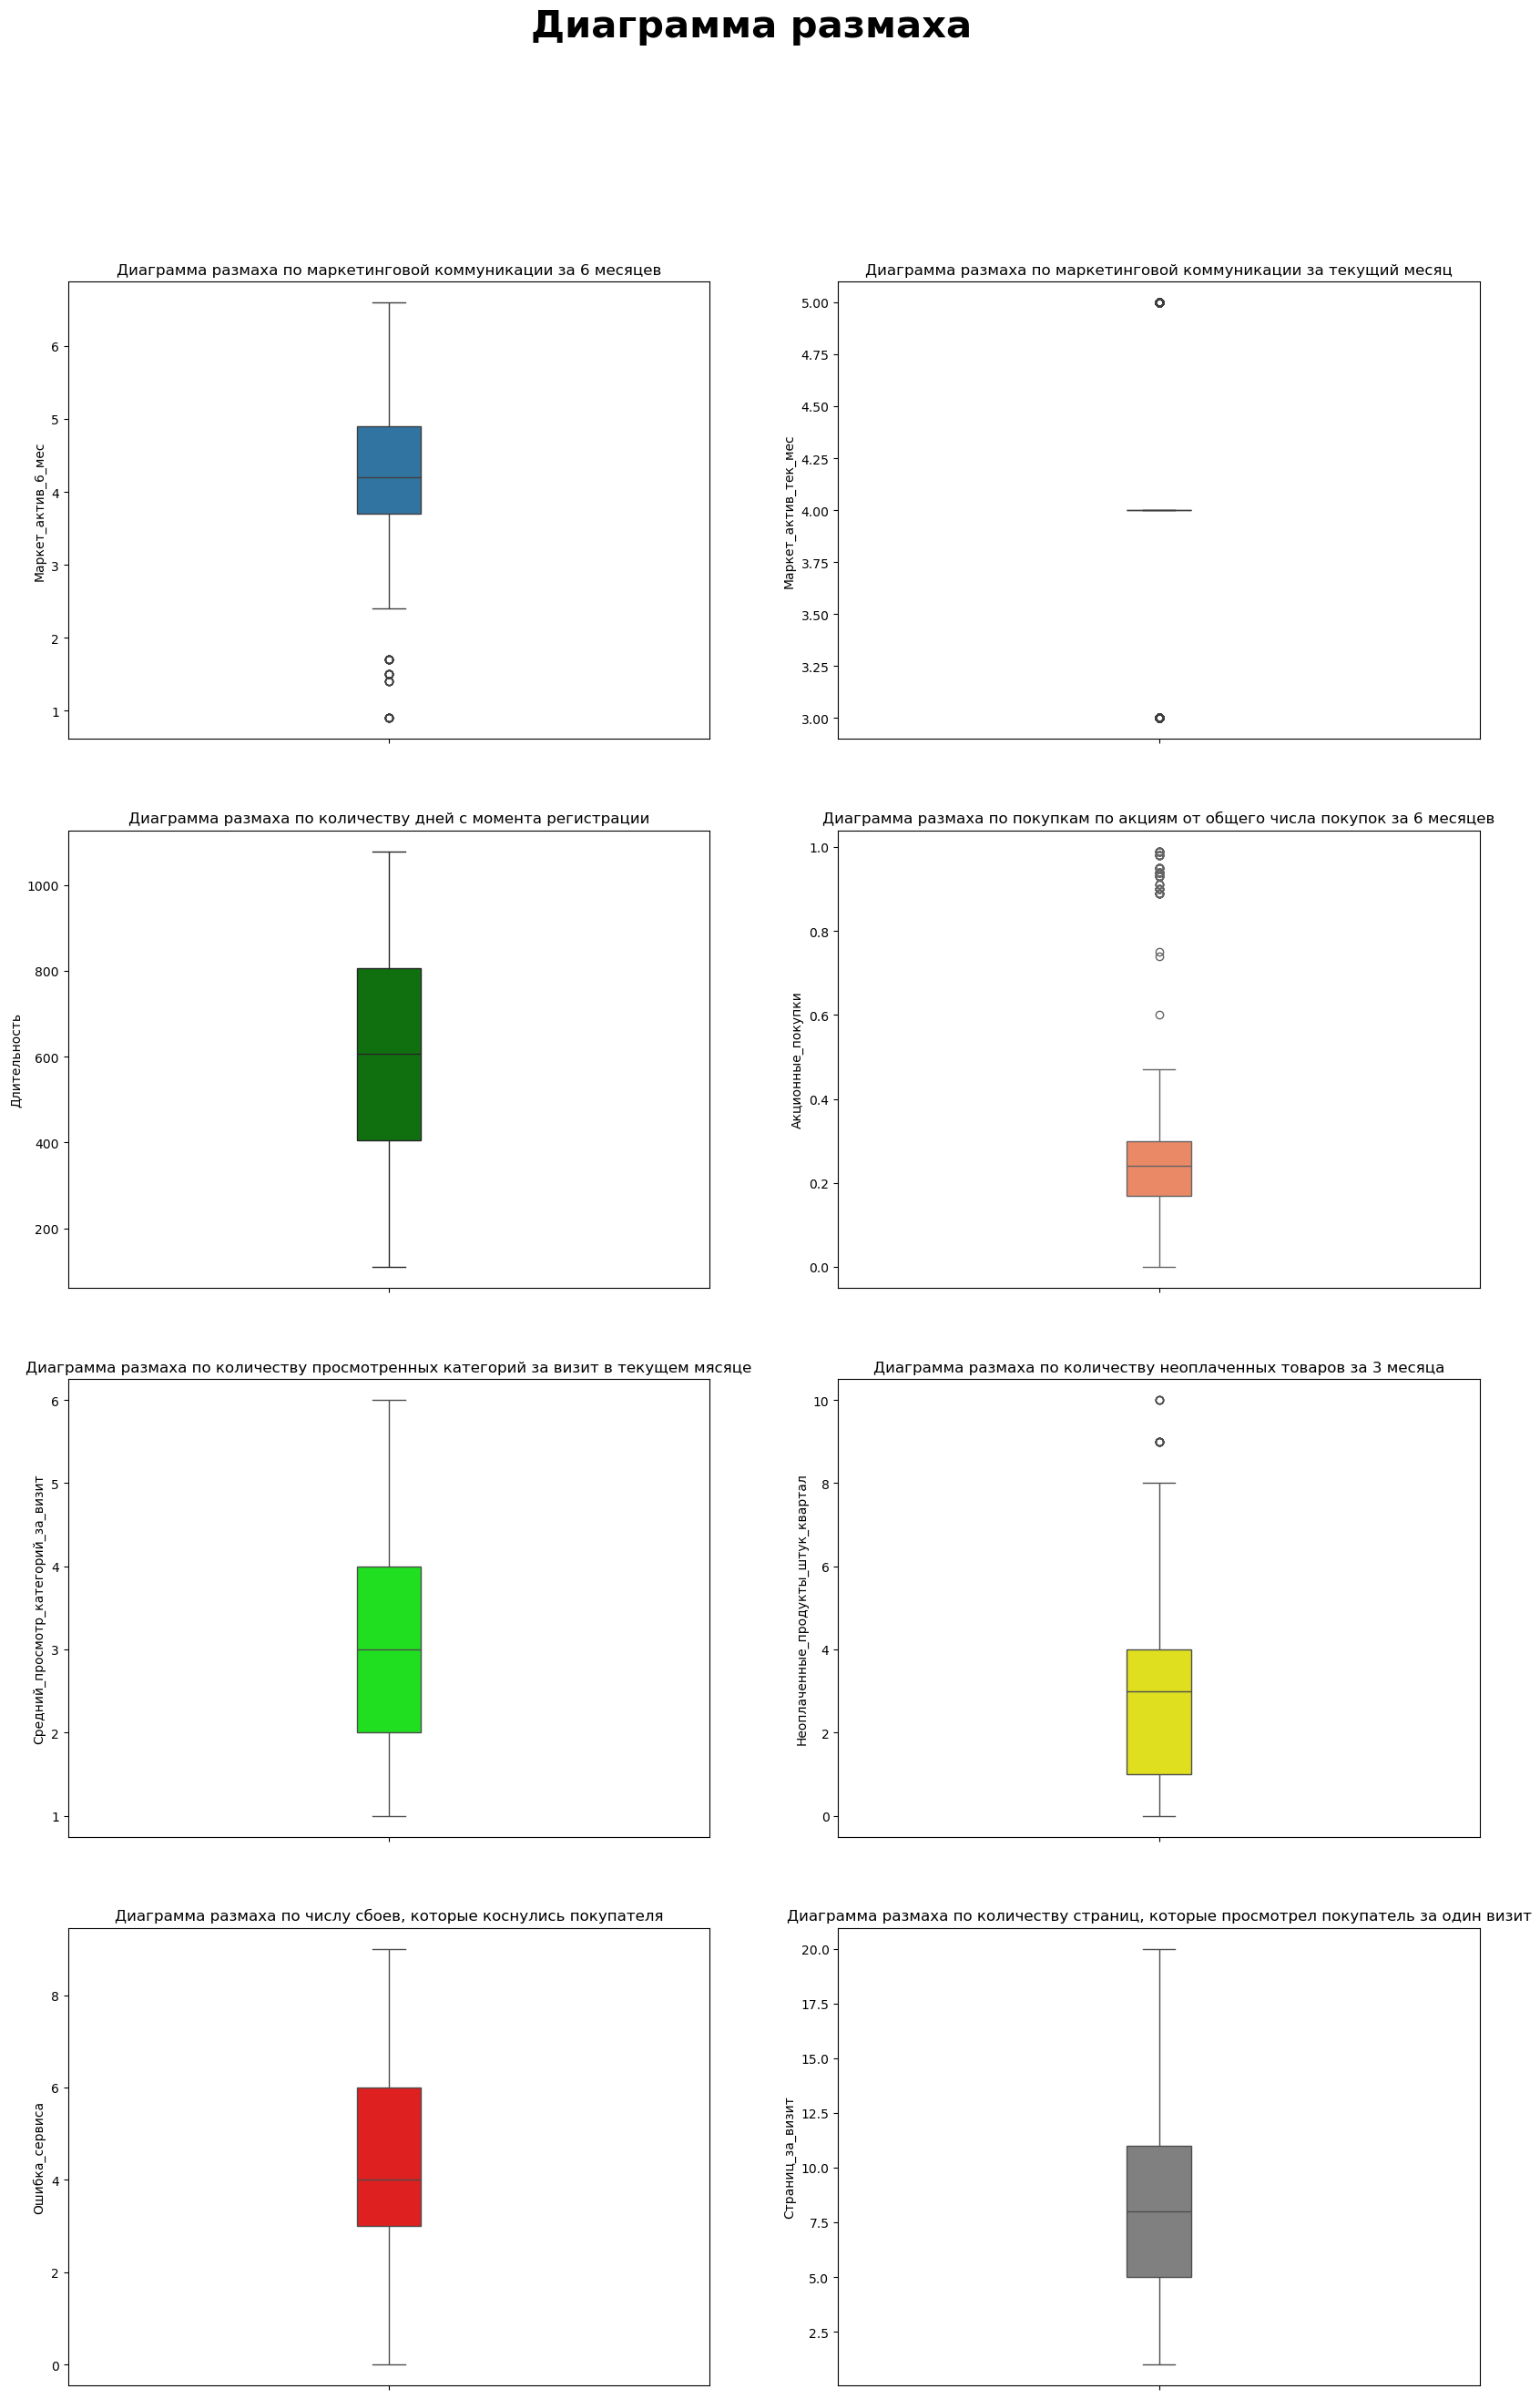

In [44]:
plt.figure(figsize=(20, 30))

plt.suptitle('Диаграмма размаха', fontsize=30, fontweight='bold')

plt.subplot(4, 2, 1)
sns.boxplot(y=market_file['Маркет_актив_6_мес'], width=.1)
plt.title('Диаграмма размаха по маркетинговой коммуникации за 6 месяцев')

plt.subplot(4, 2, 2)
sns.boxplot(y=market_file['Маркет_актив_тек_мес'], width=.1)
plt.title('Диаграмма размаха по маркетинговой коммуникации за текущий месяц')

plt.subplot(4, 2, 3)
sns.boxplot(y=market_file['Длительность'], width=.1, color='green')
plt.title('Диаграмма размаха по количеству дней с момента регистрации')

plt.subplot(4, 2, 4)
sns.boxplot(y=market_file['Акционные_покупки'], width=.1, color='coral')
plt.title('Диаграмма размаха по покупкам по акциям от общего числа покупок за 6 месяцев')

plt.subplot(4, 2, 5)
sns.boxplot(y=market_file['Средний_просмотр_категорий_за_визит'], width=.1, color='lime')
plt.title('Диаграмма размаха по количеству просмотренных категорий за визит в текущем мясяце')

plt.subplot(4, 2, 6)
sns.boxplot(y=market_file['Неоплаченные_продукты_штук_квартал'], width=.1, color='yellow')
plt.title('Диаграмма размаха по количеству неоплаченных товаров за 3 месяца')

plt.subplot(4, 2, 7)
sns.boxplot(y=market_file['Ошибка_сервиса'], width=.1, color='red')
plt.title('Диаграмма размаха по числу сбоев, которые коснулись покупателя')

plt.subplot(4, 2, 8)
sns.boxplot(y=market_file['Страниц_за_визит'], width=.1, color='grey')
plt.title('Диаграмма размаха по количеству страниц, которые просмотрел покупатель за один визит');

Выделим следующие пункты:
- Как видно из диаграммы размаха по маркетингу за 6 месяцев, есть несколько выбросов, но они не являются аномальными, так как просто, скорее всего, маркетинг компании не был направлен на этих пользователей.
- Судя по диаграмме по маркетингу за текущий месяц и квартили и медиана равняются 4, необходимо проверить описательную статистику для этого столбца, чтобы в этом убедится
- Исходя из диаграммы размаха по количеству дней с момента регистрации выбросов не обнаружено.
- Можно заметить, что есть выбросы на диаграмме по покупкам по акциям за 6 месяцев, но не будем считать их аномальными, так как, скорее всего, эти пользователи просто чаще покупают только по акциям.
- Исходя из диаграммы размаха по количеству просмотренных категорий за визит выбросов не обнаружено.
- По количеству неоплаченных товаров, хоть выбросы и обнаружены, пока не будем считать их аномальными, так как возможно эти пользователи часто не оплачивали товар в корзине просто, потому что товар случайно туда попадал или же человек просто, так и не решился на покупку.
- Исходя из диаграммы размаха по числу сбоев выбросов не обнаружено.
- Исходя из диаграммы размаха по количеству страниц за визит выбросов не обнаружено.

In [45]:
market_file['Маркет_актив_тек_мес'].describe()

count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Маркет_актив_тек_мес, dtype: float64

Так и есть, как видно по СКО, то все значения не сильно отклоняются от среднего от сюда и такой результат на графике. Что же касается выбросов, то возможно пользователь, на которого меньше сделали уклон в маркетинге меньше всего был заинтересован в покупках, а верхний выброс, то он возможно больше всех покупал.

Теперь построим гистограммы по количественным переменным.

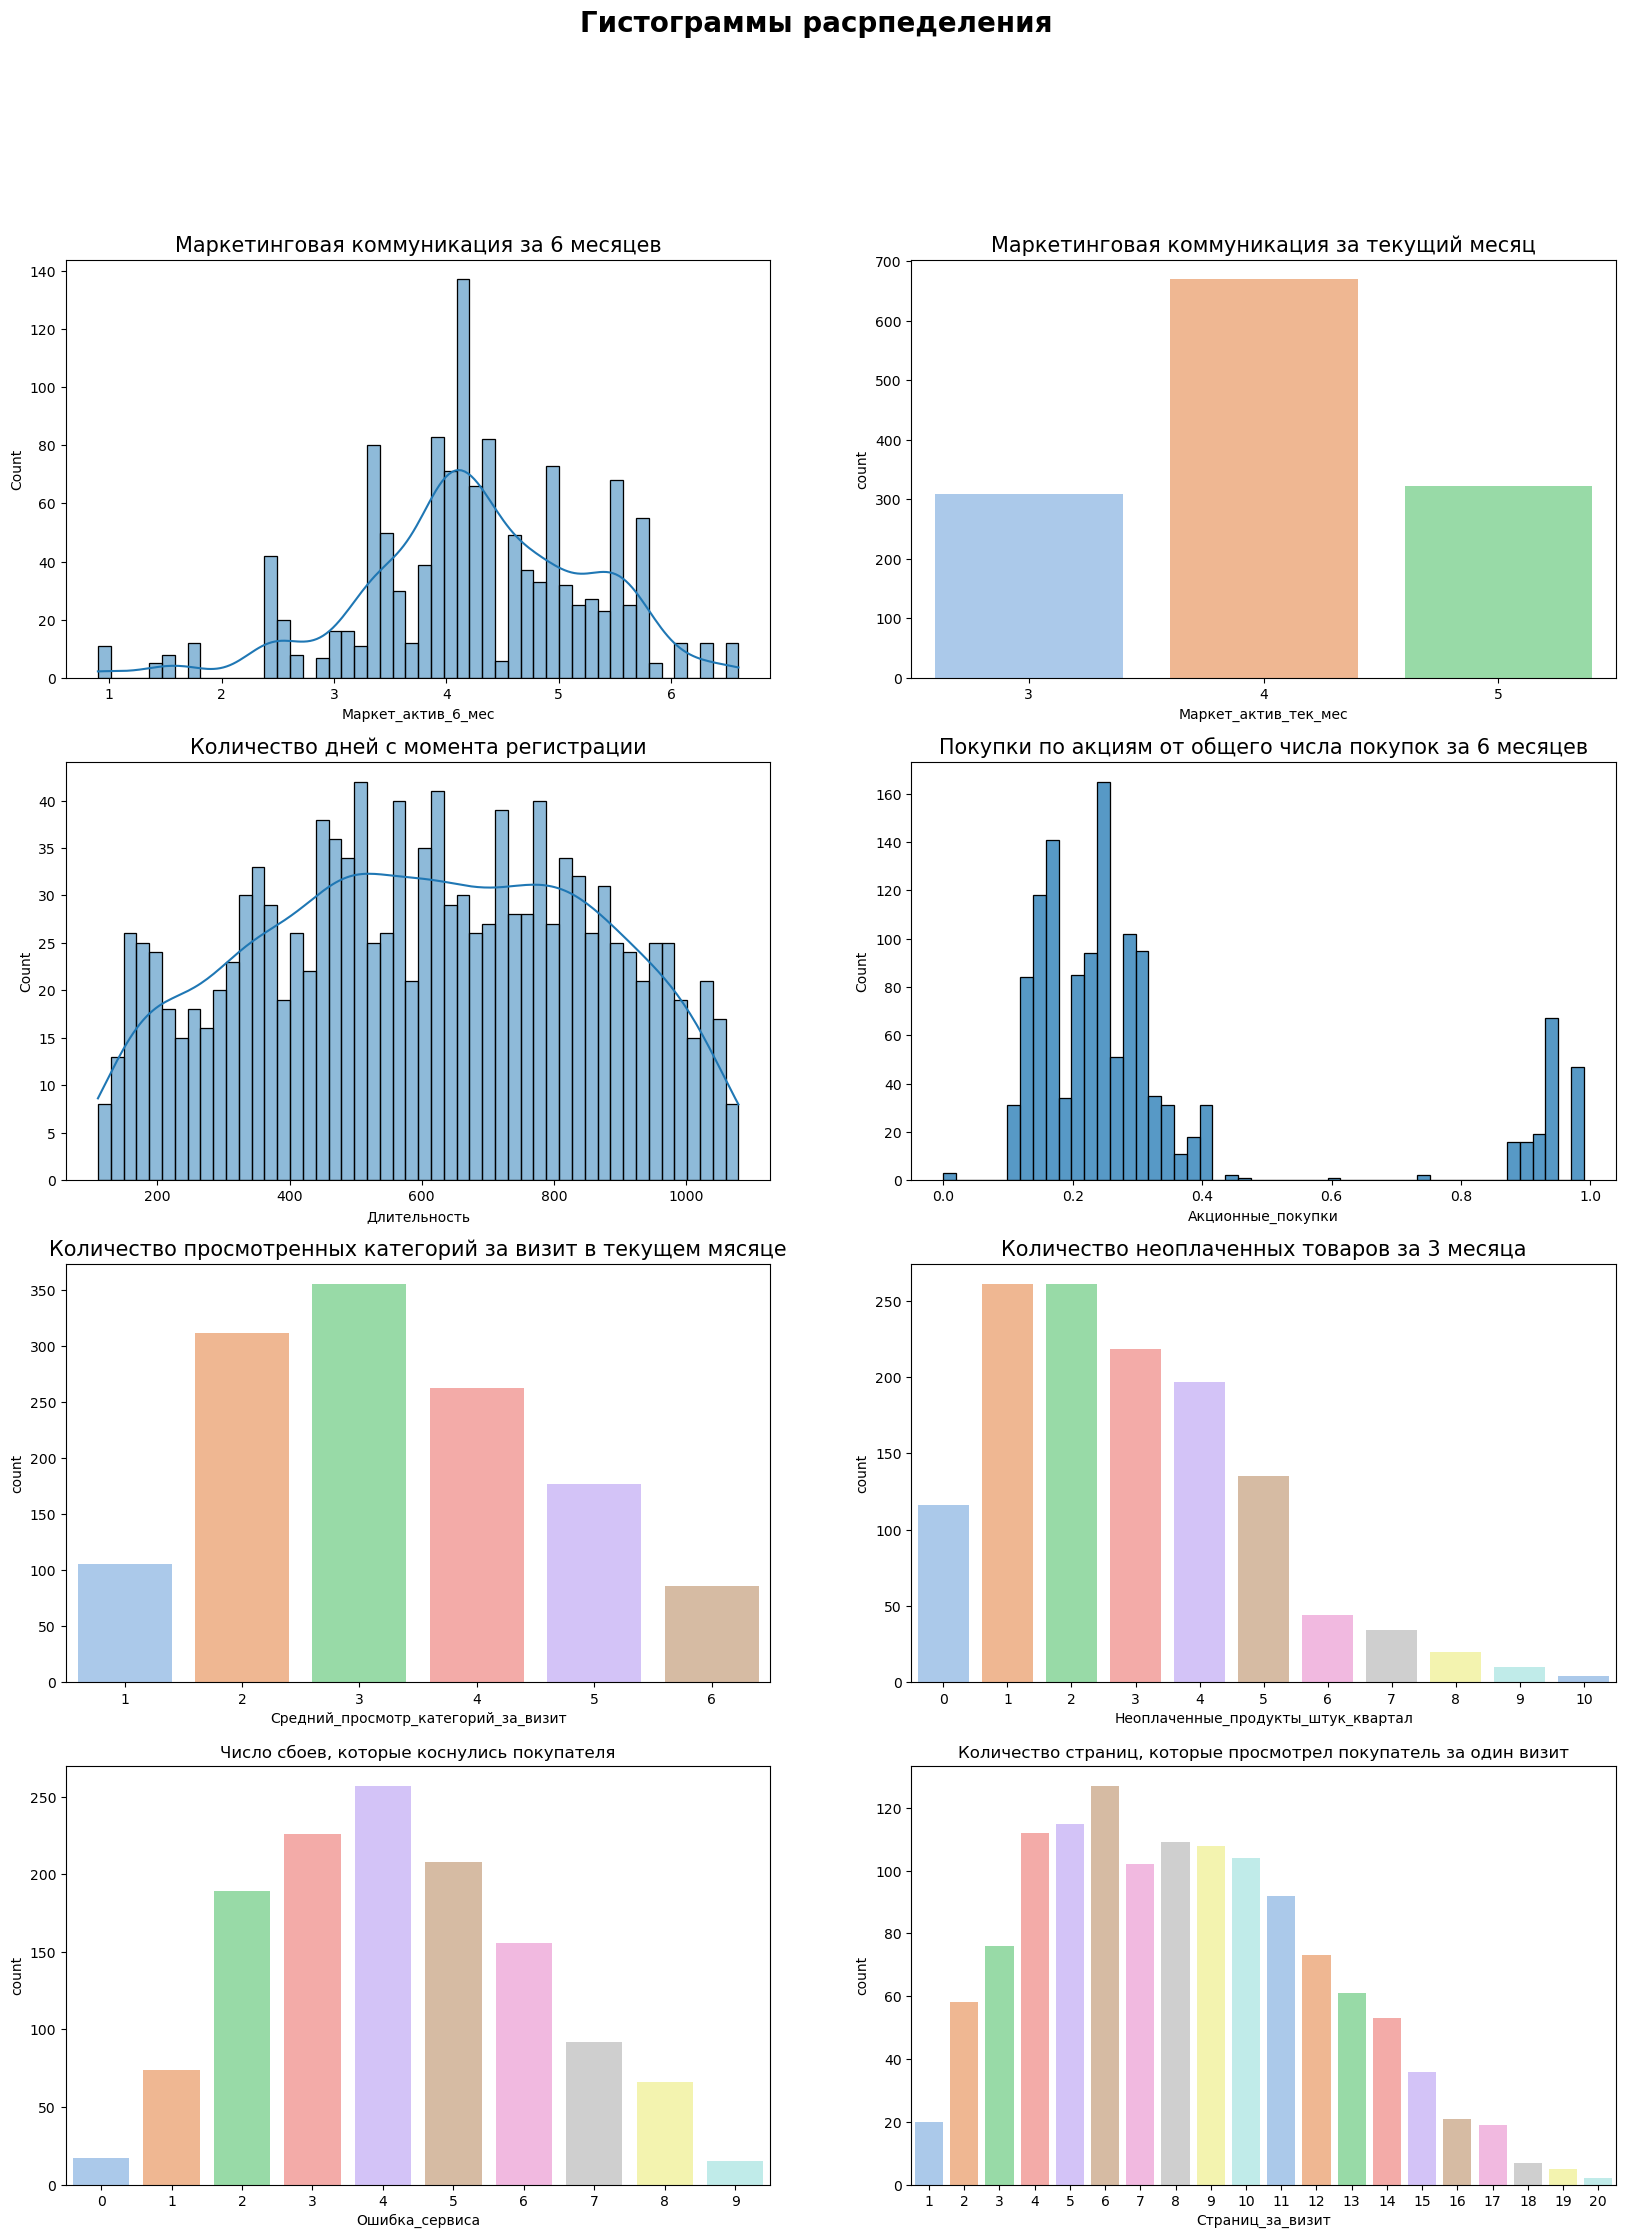

In [47]:
plt.figure(figsize=(20, 25))

plt.suptitle('Гистограммы расрпеделения', fontsize=20, fontweight='bold')

plt.subplot(4, 2, 1)
sns.histplot(data=market_file, x='Маркет_актив_6_мес', bins=50, kde=True)
plt.title('Маркетинговая коммуникация за 6 месяцев', fontsize=15)

plt.subplot(4, 2, 2)
sns.countplot(data=market_file, x='Маркет_актив_тек_мес', palette='pastel')
plt.title('Маркетинговая коммуникация за текущий месяц', fontsize=15)

plt.subplot(4, 2, 3)
sns.histplot(data=market_file, x='Длительность', bins=50, kde=True)
plt.title('Количество дней с момента регистрации', fontsize=15)

plt.subplot(4, 2, 4)
sns.histplot(data=market_file, x='Акционные_покупки', bins=50)
plt.title('Покупки по акциям от общего числа покупок за 6 месяцев', fontsize=15)

plt.subplot(4, 2, 5)
sns.countplot(data=market_file,
              x='Средний_просмотр_категорий_за_визит', palette='pastel')
plt.title('Количество просмотренных категорий за визит в текущем мясяце', fontsize=15)

plt.subplot(4, 2, 6)
sns.countplot(data=market_file,
              x='Неоплаченные_продукты_штук_квартал', palette='pastel')
plt.title('Количество неоплаченных товаров за 3 месяца', fontsize=15)

plt.subplot(4, 2, 7)
sns.countplot(data=market_file, x='Ошибка_сервиса', palette='pastel')
plt.title('Число сбоев, которые коснулись покупателя')

plt.subplot(4, 2, 8)
sns.countplot(data=market_file, x='Страниц_за_визит', palette='pastel')
plt.title('Количество страниц, которые просмотрел покупатель за один визит');

Выделим следующие пункты:
- Многие признаки распределены нормально со смещение вправо.
- По маркетингу за 6 месяцев имеет ненормальное распределение.
- По длительности признаки имеют ненормальное распределение
- По покупке от общего числа за 6 месяцев, график похож на бимодальное распределение.

Посмотрим, как уровень сервиса зависит от покупательской активности, разрешении сообщать, текущей активности.

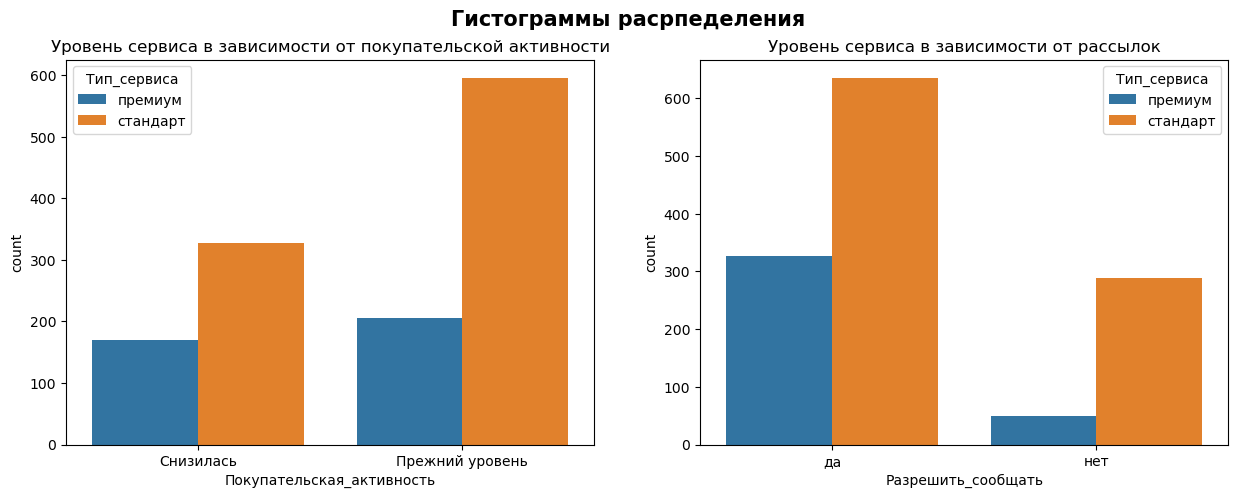

In [48]:
plt.figure(figsize=(15, 5))

plt.suptitle('Гистограммы расрпеделения', fontsize=15, fontweight='bold')

plt.subplot(1, 2, 1)
sns.countplot(data=market_file, x='Покупательская_активность', hue='Тип_сервиса')
plt.title('Уровень сервиса в зависимости от покупательской активности')

plt.subplot(1, 2, 2)
sns.countplot(data=market_file, x='Разрешить_сообщать', hue='Тип_сервиса')
plt.title('Уровень сервиса в зависимости от рассылок');

Выделим следующее:
- Можно сказать, что у покупательской активность не зависит от уровня сервиса. Что и у премиум пользователей, что и у стандартных преобладает `прежний уровень`.
- Уровень сервиса не зависит от разрешения рассылок.

Приступим к изучению зависимости уровня сервиса от количественных перемен и будем для этого строить гистограмму.

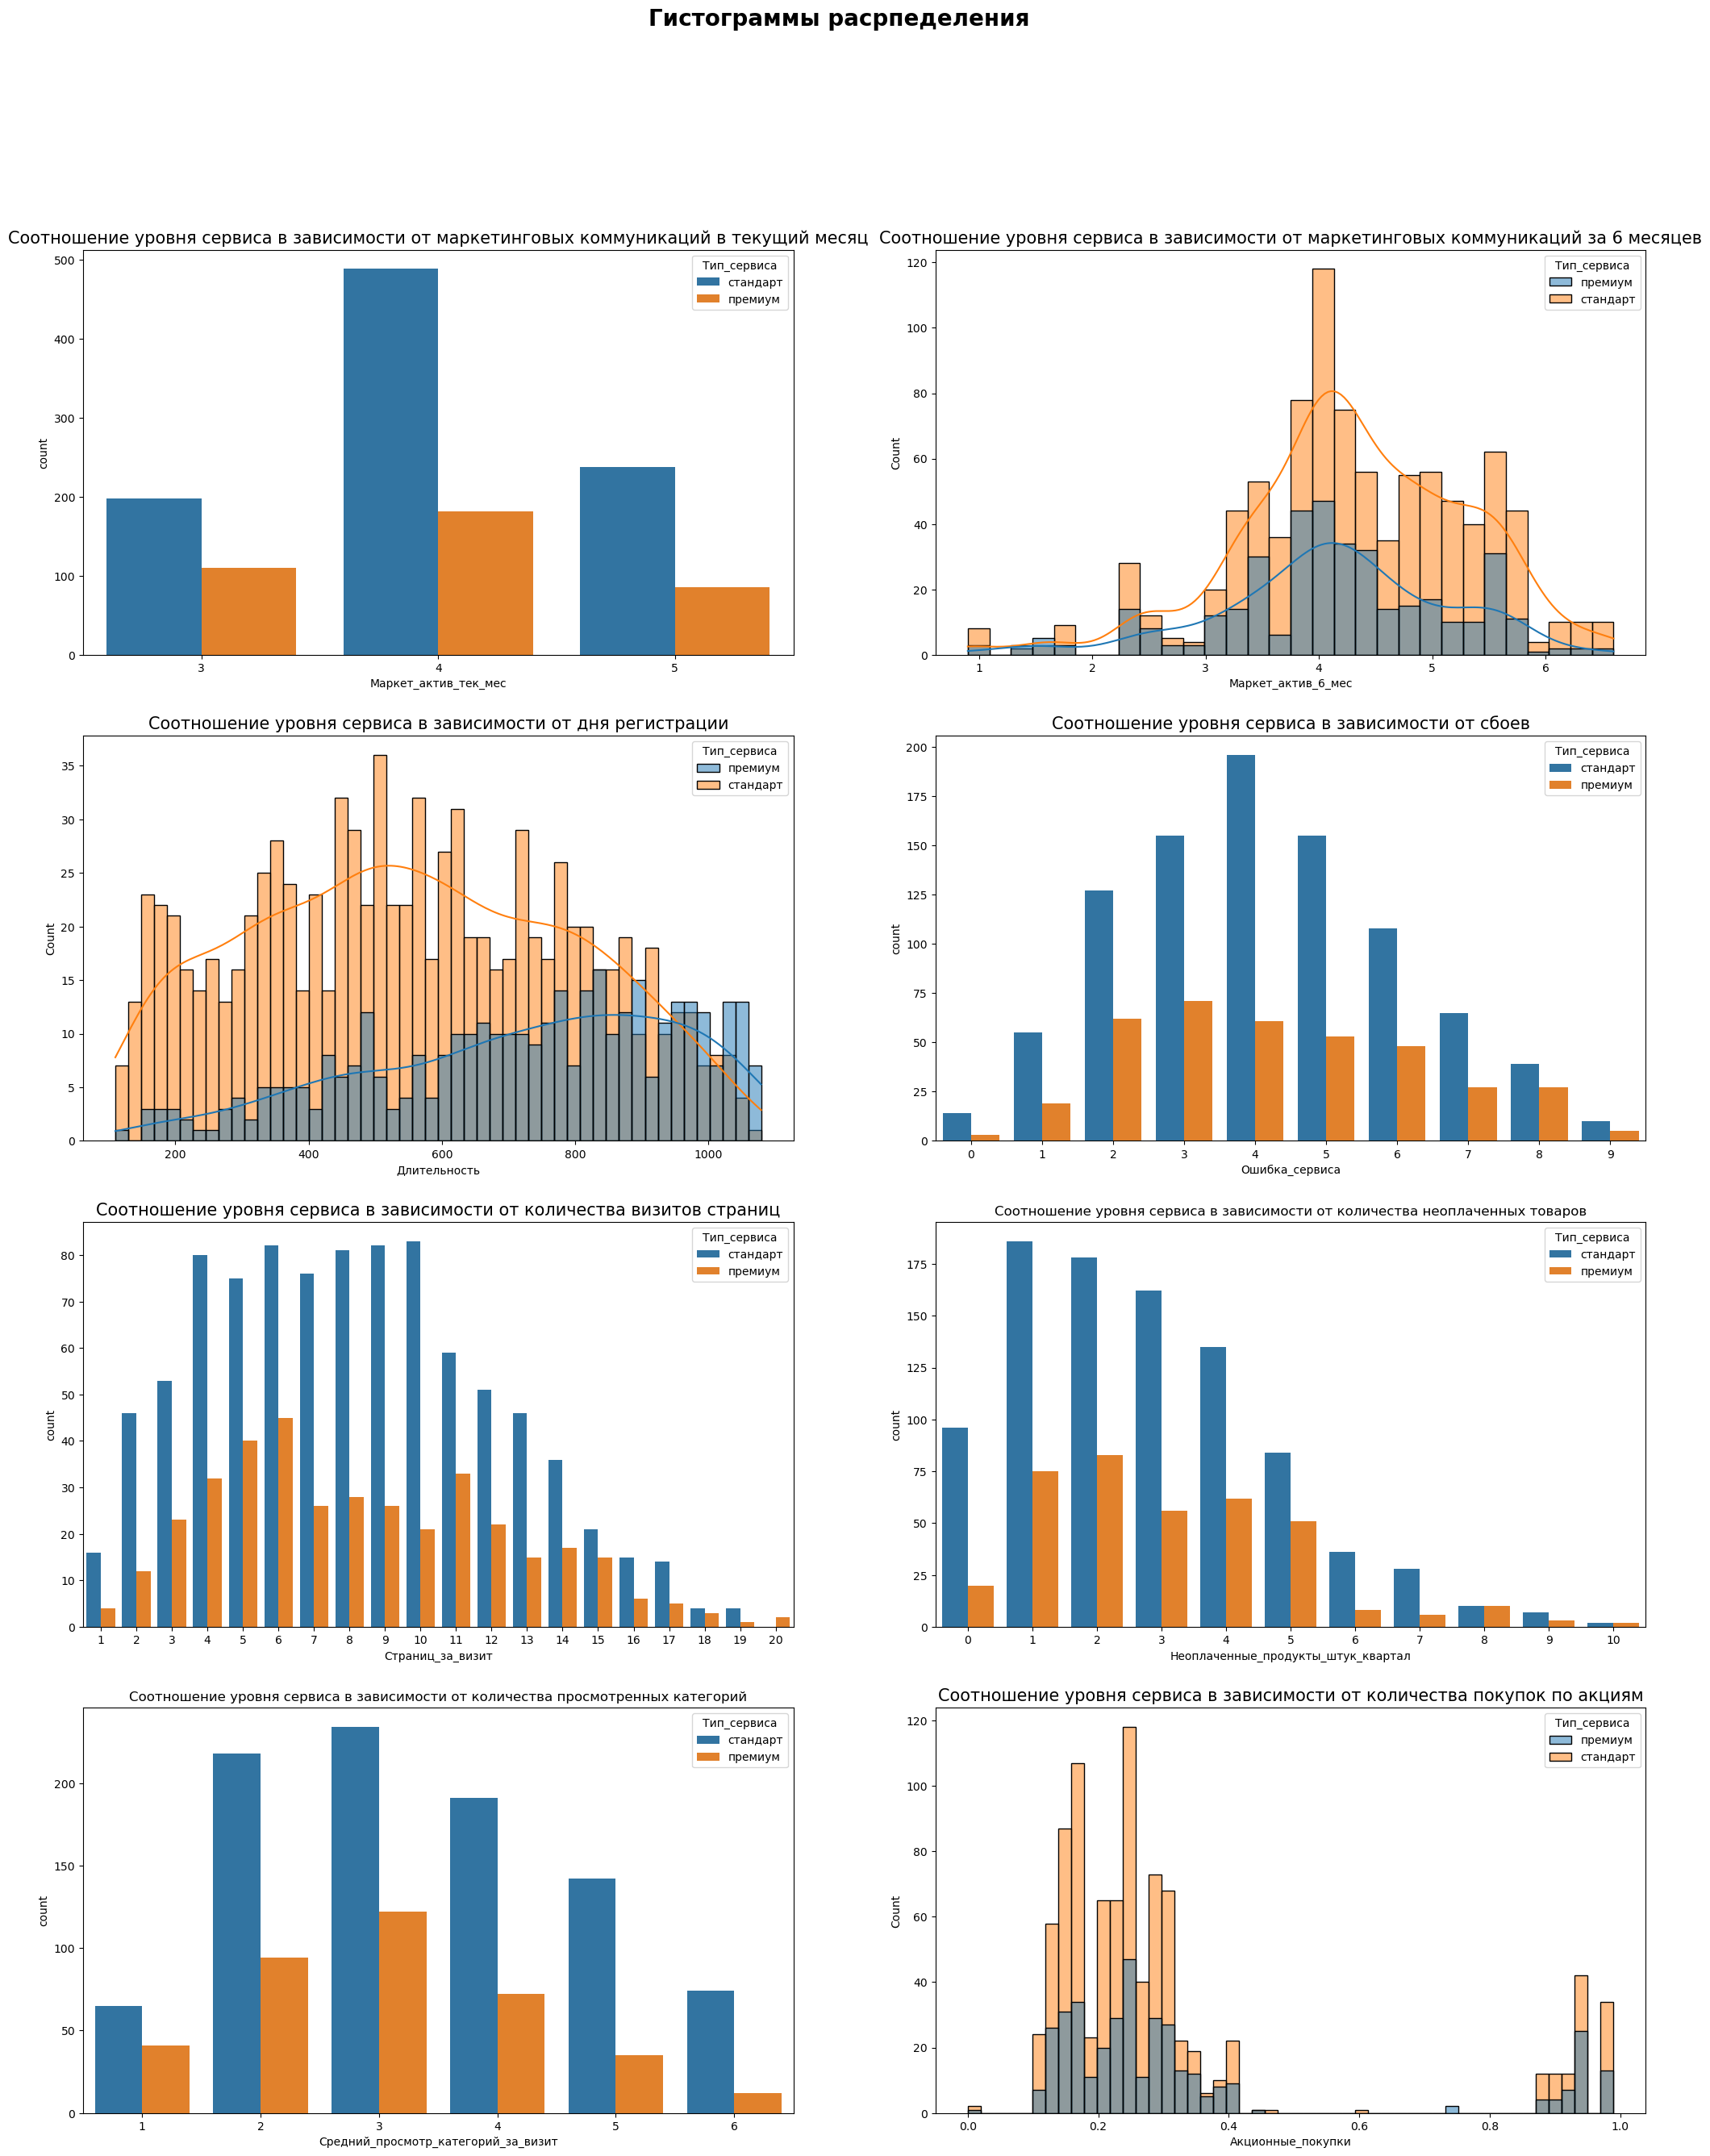

In [49]:
plt.figure(figsize=(25, 30))

plt.suptitle('Гистограммы расрпеделения', fontsize=20, fontweight='bold')

plt.subplot(4, 2, 1)
sns.countplot(data=market_file, x='Маркет_актив_тек_мес', hue='Тип_сервиса')
plt.title('Соотношение уровня сервиса в зависимости от маркетинговых коммуникаций в текущий месяц', fontsize=15)

plt.subplot(4, 2, 2)
sns.histplot(data=market_file, x='Маркет_актив_6_мес',
             bins=30, kde=True, hue='Тип_сервиса')
plt.title('Соотношение уровня сервиса в зависимости от маркетинговых коммуникаций за 6 месяцев', fontsize=15)

plt.subplot(4, 2, 3)
sns.histplot(data=market_file, x='Длительность',
             bins=50, kde=True, hue='Тип_сервиса')
plt.title('Соотношение уровня сервиса в зависимости от дня регистрации', fontsize=15)

plt.subplot(4, 2, 4)
sns.countplot(data=market_file, x='Ошибка_сервиса', hue='Тип_сервиса')
plt.title('Соотношение уровня сервиса в зависимости от сбоев', fontsize=15)

plt.subplot(4, 2, 5)
sns.countplot(data=market_file, x='Страниц_за_визит', hue='Тип_сервиса')
plt.title('Соотношение уровня сервиса в зависимости от количества визитов страниц', fontsize=15)

plt.subplot(4, 2, 6)
sns.countplot(data=market_file,
              x='Неоплаченные_продукты_штук_квартал', hue='Тип_сервиса')
plt.title(
    'Соотношение уровня сервиса в зависимости от количества неоплаченных товаров')

plt.subplot(4, 2, 7)
sns.countplot(data=market_file,
              x='Средний_просмотр_категорий_за_визит', hue='Тип_сервиса')
plt.title(
    'Соотношение уровня сервиса в зависимости от количества просмотренных категорий')

plt.subplot(4, 2, 8)
sns.histplot(data=market_file, x='Акционные_покупки',
             hue='Тип_сервиса', bins=50)
plt.title('Соотношение уровня сервиса в зависимости от количества покупок по акциям', fontsize=15);

Выделим следующие пункты:
- Многие признаки распределены нормально со смещение вправо.
- По маркетингу в текущий месяц, можно сказать, что в среднем маркетинг компании направлен на всех клиентов
- График по маркетингу за 6 месяцев имеет ненормальное распределение
- По длительности признак имеет ненормальное распределение. Пользователи, которые уже давно зарегистрировались обычно имеют премиум.
- Можно заметить, что большое количество страниц посещают чаще премиум пользователи.
- Пользователи стандартного уровня чаще не оплачивает товары, что и логично их просто больше, также можно заметить, что, начиная от 8 товаров пользователи уровней сравниваются, что может свидетельствовать, что премиум пользователи чаще не оплачивают товары.
- Видно, что премиум пользователи обычно просматривают меньшее количество категорий, скорее всего связано с тем, что премиум пользователи уже давно пользуются сервисом и поэтому они просматривают только нужные для себя категории, а вот пользователи стандартного уровня чаще просматривают большее количества категорий, что может говорить о том, что это относительно новые пользователи и они смотрят что вообще есть в этом сервисе.
- Пользователи обоих уровней одинаково покупают по акциям.

### Исследуем датафрейм `market_money` для всех клиентов

Приступим к анализу таблицы `market_money` и построим круговую диаграмму.

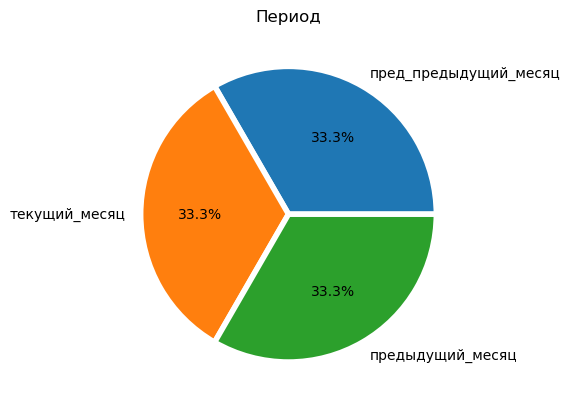

In [50]:
plt.pie(market_momey_period.values, labels=market_momey_period.index,
        wedgeprops={'linewidth': 4, 'edgecolor': 'white'}, autopct='%.1f%%')
plt.title('Период');

За каждый период одинаковое количество информации.

Изучим количественные переменные в датафрейме и начнем с диаграммы размаха

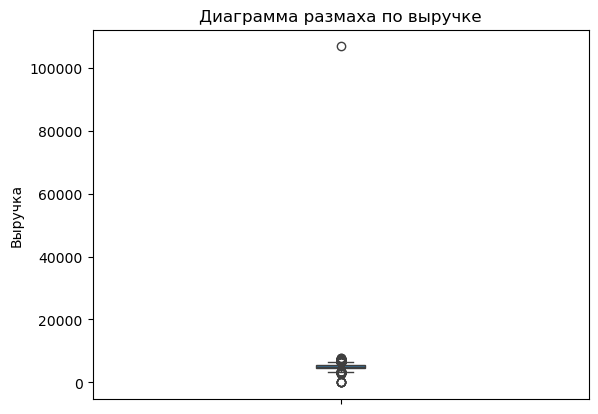

In [51]:
# Cтроим диаграмму размаха
sns.boxplot(y=market_money['Выручка'], width=.1)
plt.title('Диаграмма размаха по выручке');

Есть очень аномально значение, посмотри на него более подробно.

In [52]:
# Cмотри на зачение больше 100000
market_money[market_money['Выручка'] > 100000]

,id,Период,Выручка
98,215380,текущий_месяц,106862.2


У этого клиента очень большая выручка, интересно посмотреть выручку этого клиента за другие приоды, если она есть.

In [53]:
market_money[market_money['id'] == 215380]

,id,Период,Выручка
96,215380,пред_предыдущий_месяц,5051.0
97,215380,предыдущий_месяц,6077.0
98,215380,текущий_месяц,106862.2


Видно, что за предыдущие периоды максимальная выручка 6077, так что это значение выглядит аномальным и поэтому его стоит удалить.

In [54]:
market_money = market_money[market_money['Выручка']
                            < 100000]  # Удалям аномальное значение

Теперь еще раз построим диаграмму размаха

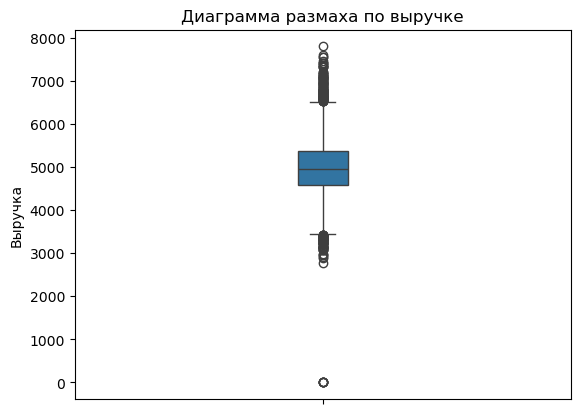

In [55]:
# Cтроим диаграмму размаха
sns.boxplot(y=market_money['Выручка'], width=.1)
plt.title('Диаграмма размаха по выручке');

Видно, что есть много выбросов, но они не являются аномальными, кроме одного самого маленького, также посмотрим на него.

In [56]:
market_money[market_money['Выручка'] < 1000]

,id,Период,Выручка
0,215348,пред_предыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,пред_предыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,пред_предыдущий_месяц,0.0


Таких пользователей оказалось 3 и за два предыдущих периода с них маркет не имел выручки, не будем считать их аномальными, так как клиенты могли и ничего не покупать, а зарегистрировались, для того, чтобы возможно получать интересные предложения, которые их заинтересуют для покупки, но по условию задачи клиента нам необходимо учитывать активных пользователей за 3 месяца, поэтому эти данные нам не нужны и мы можем от них избавиться.

In [57]:
market_money = market_money[market_money['Выручка']
                            > 0]  # Удалаям не нужные данные

Еще раз построим диаграмму размаха.

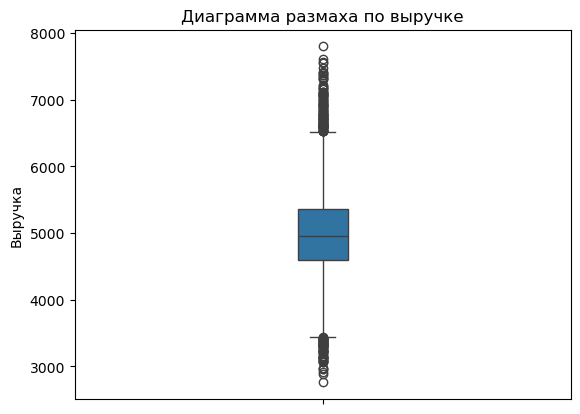

In [58]:
# Cтроим диаграмму размаха
sns.boxplot(y=market_money['Выручка'], width=.1)
plt.title('Диаграмма размаха по выручке');

In [59]:
# Группируем по уровню и выручке, считаем количество пользователей и сортируем по возрастанию
period_revenue = market_money.groupby('Период')['Выручка'].sum().sort_values()

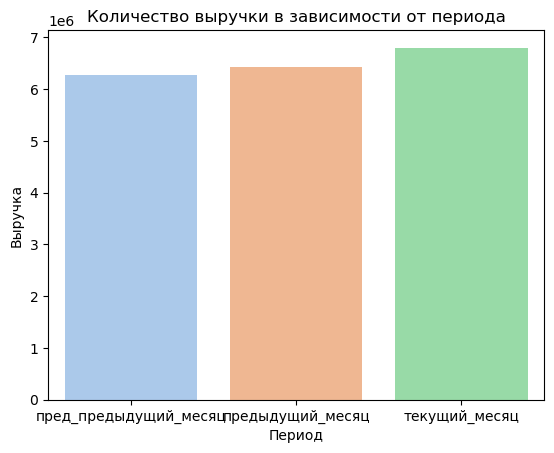

In [60]:
sns.barplot(period_revenue, palette='pastel');
plt.title('Количество выручки в зависимости от периода');

Можно заметить, что выручка с каждым периодом растет.

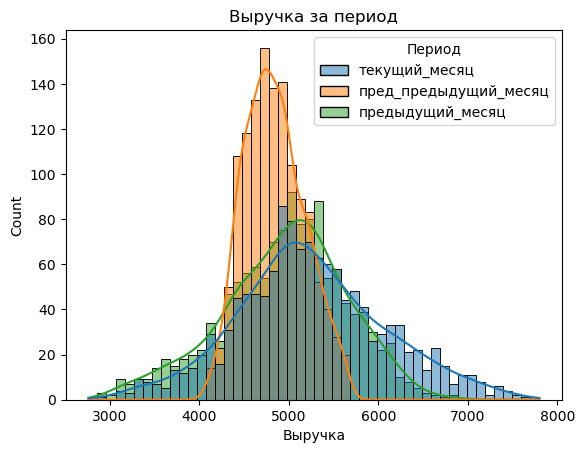

In [61]:
sns.histplot(data=market_money, x='Выручка', hue='Период', bins=50, kde=True)
plt.title('Выручка за период');

Судя по графикам, то получаем, что данные распределены нормально по всем 3 месяцам

### Исследуем датафрейм `market_time` для всех клиентов

Приступим к анализу таблицы `market_time` и построим круговую диаграмму.

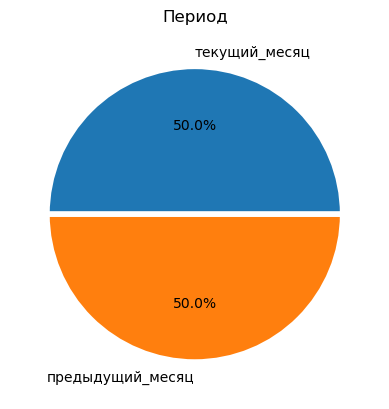

In [62]:
plt.pie(market_time_period.values, labels=market_time_period.index,
        wedgeprops={'linewidth': 4, 'edgecolor': 'white'}, autopct='%.1f%%')
plt.title('Период');

Хранится информация за два последних месяца и соотношение одинаковое.

Изучим количественый столбец данного датафрема

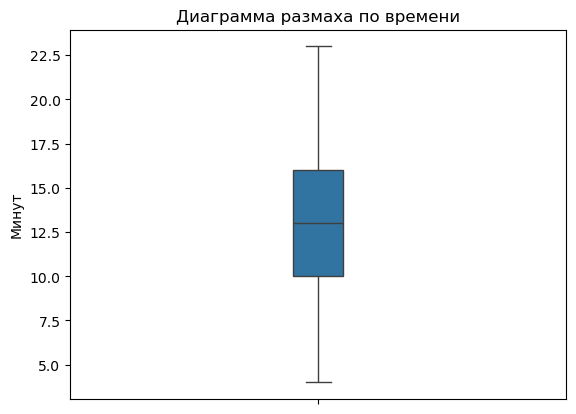

In [63]:
# Cтроим диаграмму размаха
sns.boxplot(y=market_time['Минут'], width=.1)
plt.title('Диаграмма размаха по времени');

Выбросов не было обнаружено

Соотношение в целом равное, только текущий месяц не намного уступает предыдущему

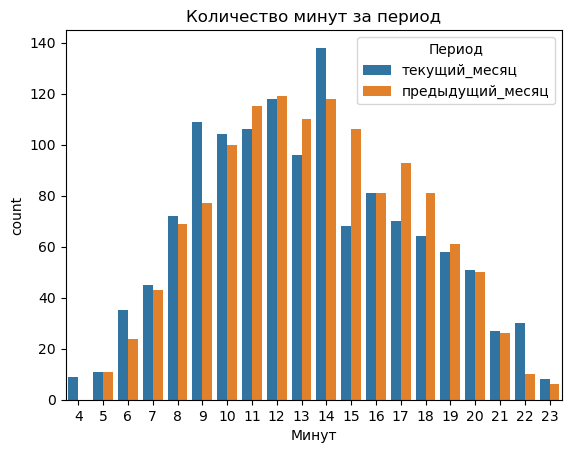

In [64]:
sns.countplot(data=market_time, x='Минут', hue='Период')
plt.title('Количество минут за период');

Данные нормально распределены со смещение вправо. Количество минут за оба периода в целом одинаковое.

### Исследуем датафрейм `money` для всех клиентов

Приступим к изучению данных в таблице `money` и построим диаграмму размаха

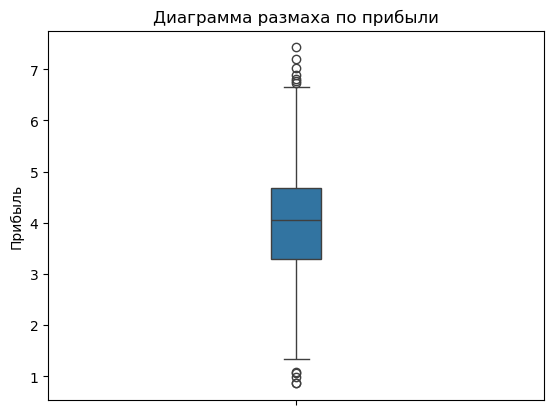

In [65]:
# Cтроим диаграмму размаха
sns.boxplot(y=money['Прибыль'], width=.1)
plt.title('Диаграмма размаха по прибыли');

Выбросы в данном случае не являются аномальными. Посмотрим есть ли в этом датафрейме не активные пользователи, то есть прибыль с них равна нулю.

In [66]:
money[money['Прибыль'] == 0]

,id,Прибыль


Таких пользователей нет, а значит данные только по активным пользователям.

### Вывод

По результатам исследователького анализа можно сделать следующие выводы:

1. На маркете преобладают пользователи со стандартным уровнем `71.1%`.
2. В маркете `74%` разрешила присылать покупателю дополнительные предложения о товаре.
3. Категории на маркете по посещаемости расположились в следующем виде:
    - Товары для детей - `25.4%`.
    - Домашний текстиль - `19.3%`.
    - Косметика и аксесуары - `17.2%.
    - Техника для красоты и здоровья - `14.2`
    - Мелкая бытовая техника и электроника - `13.4%`
    - Кухонная посуда - `10.6%`.
4. Среди `61.7%` пользователей маркета сохраниалсь прежняя покупательская ативность.
5. В таблице `market_file` было найдено несколько выбрсов по количественным переменым, но аномальными они не являются.
6. Несмотря на то, что пользователей премиума меньше их значения практически похожи со стандртным уровнем по описательной статистике.
7. Можно сказать, что у покупательская активность не зависит от уровня сервиса. Что и у премиум пользователей, что и у стандартных преобладает `прежний уровень`.
8. Уровень сервиса не зависит от разрешение рассылок.
9. Хоть пользователей стандартного уровня больше, можно сказать, что в среднем маркетинг компании направлен на всех клиентов.
10. График имеет ненормальное распределение. Видно, что премиум пользователи уже давно зарегистрировались на маркете от 800 дней и более.
11. График зависимости уровня сервиса от сбоев имеет нормальное распределение смещенное вправо.
12. График зависимости уровня сервиса от посещения страниц имеет нормальное распределение смещенное вправо. Также можно заметить, что большое количество страниц посещают чаще премиум пользователи.
13. Пользователи стандратного уровня чаще не оплачивает товары, что и логично их просто больше, также можно заметить, что, начиная от 8 товаров пользователи уровней сравниваются, что может свидельстовать о том, что премиум пользователи чаще не оплачивают товары.
14. Пользователи стандратного уровня чаще не оплачивает товары, что и логично их просто больше, также можно заметить, что, начиная от 8 товаров пользователи уровней сравниваются, что может свидельстовать о том, что премиум пользователи чаще не оплачивают товары.
15. Пользователи обоих уровней одинаково покупают по акциям.
16. Информация о выручке за три периода имеет одинаковое количество - `33.3%`.
17. В таблице `market_money` по столбцу выручки было найдено аномальное значение, так как за предыдущие периоды максимальная выручка от пользователя была `6077`, а за текущий `106862.2` при этом это единственое такое крупное значение, поэтому оно было удалено.
18. Посмотрели на пользователей выручка с которых равна нулю. Таких пользователей оказалось 3 и за два предыдущих периода с них маркет не имел выручки,такие клиенты могли ничего не покупать, а зарегистрировались, для того, чтобы возможно получать интерсные предложения, которые их заинтересуют для покупки, но по условию задачи клиента нам необходимо учитывать активнных пользователей за 3 месяца, поэтому эти данные нам не нужны и мы от них избавились.
19. С каждым периодом выручка маркета растет.
20. В таблице `market_time` в столбце с информацией по периодам в процентном соотношении одинаковая - `50%`, так как в данной таблице всего 2 периода.
21. По времени проведенное на сайте текущий период немного уступает предыдущему.
22. В таблице `money` нет аномально больших значений, а также пользователей с нулевой выручкой.

## Объединение данных.

Объединим таблицы `market_file`, `market_money`, `market_time`. При этом необходимо создать отдельный столбец для выручек и минут по каждому из периодов.

In [67]:
market_total = market_file.copy()  # Делаем копию датафрейма

Создадим три датафрейма из `market_money`, в которых будет хранится выручка по периодам.

In [68]:
market_pred_pred_period = (
    market_money[market_money['Период'] == 'пред_предыдущий_месяц']
    .rename(columns={'Выручка': 'Выручка_пред_предыдущий_месяц'})
    [['id', 'Выручка_пред_предыдущий_месяц']]
)

In [69]:
market_pred_period = (
    market_money[market_money['Период'] == 'предыдущий_месяц']
    .rename(columns={'Выручка': 'Выручка_предыдущий_месяц'})
    [['id', 'Выручка_предыдущий_месяц']]
)

In [70]:
market_period = (
    market_money[market_money['Период'] == 'текущий_месяц']
    .rename(columns={'Выручка': 'Выручка_текущий_месяц'})
    [['id', 'Выручка_текущий_месяц']]
)

Объединим созданные датафреймы с датафеймом `market_total`.

In [71]:
market_total = market_total.merge(market_period, on='id', how='inner')

In [72]:
market_total = market_total.merge(market_pred_period, on='id', how='inner')

In [73]:
market_total = market_total.merge(market_pred_pred_period, on='id', how='inner')

Создадим три датафрейма из `market_time`, в которых будет хранится минуты на сайте по периодам.

In [74]:
market_time_pred_period = (
    market_time[market_time['Период'] == 'предыдущий_месяц']
    .rename(columns={'Минут': 'Минут_предыдущий_месяц'})
    [['id', 'Минут_предыдущий_месяц']]
)

In [75]:
market_time_period = (
    market_time[market_time['Период'] == 'текущий_месяц']
    .rename(columns={'Минут': 'Минут_текущий_месяц'})
    [['id', 'Минут_текущий_месяц']]
)

Объединим созданные датафреймы с датафеймом `market_total`.

In [76]:
market_total = market_total.merge(
    market_time_pred_period, on='id', how='inner')

In [77]:
market_total = market_total.merge(market_time_period, on='id', how='inner')

Выведем первые 5 строк датафрейма основного. Также можно отметить, что некоторых нет в основном датафрейме, это связано с тем, что они не совершали покупки за последние 3 месяца.

In [78]:
market_total.head()

,id,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_текущий_месяц,Выручка_предыдущий_месяц,Выручка_пред_предыдущий_месяц,Минут_предыдущий_месяц,Минут_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4971.6,5216.0,4472.0,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5058.4,5457.5,4826.0,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6610.4,6158.0,4793.0,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5872.5,5807.5,4594.0,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5388.5,4738.5,5124.0,10,10


## Корреляционный анализ.

Исходя из исследовательского анализа стало понятно, что данные в нашем датафреме распределены не нормально, поэтому для изучения взаимосвязи между переменами в таблице `market_total` необходимо использовать коэффициент корреляции $\phi_k$, он может находить взаимосвязь между категориальными, порядковыми и интервальными признаками. Чем ближе его значение по модулю к 1, тем сильнее связь.

Расcчитаем корреляцию при помощи библиотеки $\phi_k$ для всех наших признаков

In [79]:
# Расчитываем коэффициент корреляции Фи
phik_matrix = market_total.phik_matrix()

interval columns not set, guessing: ['id', 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'Выручка_текущий_месяц', 'Выручка_предыдущий_месяц', 'Выручка_пред_предыдущий_месяц', 'Минут_предыдущий_месяц', 'Минут_текущий_месяц']


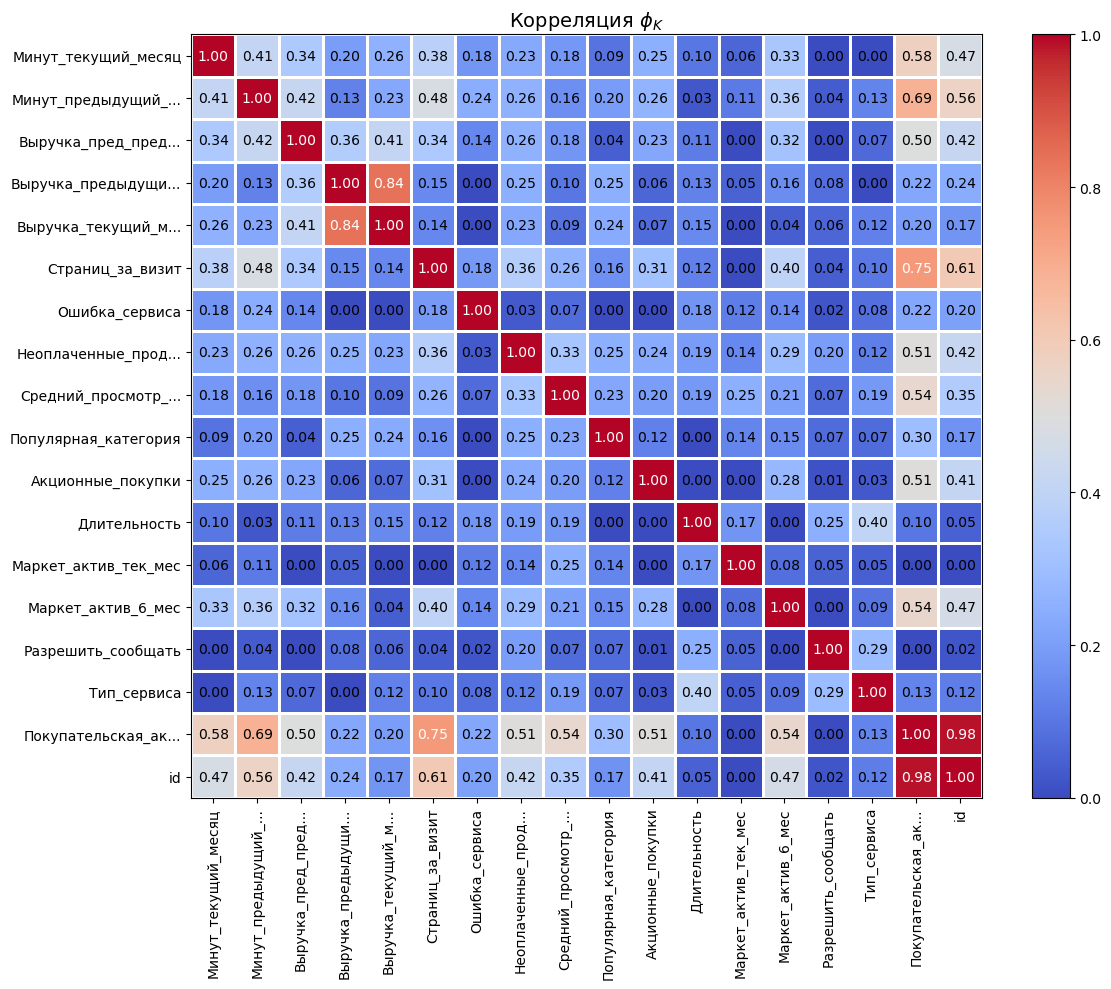

In [80]:
plot_correlation_matrix(phik_matrix.values, x_labels=phik_matrix.columns, y_labels=phik_matrix.index,
                        vmin=0, vmax=1, color_map='coolwarm', title='Корреляция $\phi_K$', fontsize_factor=1,
                        figsize=(12, 10))
plt.tight_layout()

Нашем целевым признаком является `Покупательская активность` посмотрим, как она взаимодействует с другими признаками.

Она имеет мультиколлинеарность с `id` из-за этого могут быть утечки данных, но так как этот столбец содержит только id пользователей, то при обучении модели он не будет использоваться.

1. Наш целевой признак имеет сильную взаимосвязь с признаками `Страниц_за_визит` = 0.75 и `Минут_предыдущий_месяц` = 0.69.
2. С признаками `Минут_текущий_месяц`, `Выручка_пред_предыдущий_месяц`, `Неоплаченные_продукты_штук_квартал`, `Средний_просмотр_категорий_за_визит`, `Акицонные_покупки` и `Маркет_актив_6_мес` имеется хорошая взаимосвязь.
3. С признаками `Тип_сервиса`, `Длительность`, `Ошибка_сервиса`, `Выручка_текущий_месяц`, `Выручка_предыдущий_месяц` и `Популярная_категория` целевой признак имеет слабую взаимосвязь.
4. С признаками `Маркет_актив_тек_мес` и `Разрешить_сообщать` целевой признак не имеет взаимосвязи.

Мультиколлинеарность между признаками не наблюдается

## Обучение модели.

Приступим к обучению модели. Наш целевой признак - `Покупательская активность`. Для этого воспользуемся 4 моделями `LogisticRegression`, `SVC`, `KNeighborsClassifier` и `DecisionTreeClassifier` и для них будет подбирать гиперпараметры при помощи `RandomizedSeachCV` и выведем параметры лучшей модели. Оценивать модель будем по метрике `ROC-AUC`, так как эта метрика классификации учитывает работу модели при всех возможных значениях порогов в отличие от других.

In [81]:
X = market_total.drop(columns=['Покупательская_активность', 'id'], axis=1)
y = market_total['Покупательская_активность']

# Разделяем данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

In [82]:
# Создаём списки с названиями признаков
ohe_columns = ['Тип_сервиса', 'Разрешить_сообщать', 'Популярная_категория']
num_columns = ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
               'Акционные_покупки', 'Средний_просмотр_категорий_за_визит',
               'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
               'Страниц_за_визит', 'Выручка_текущий_месяц', 'Выручка_предыдущий_месяц',
               'Выручка_пред_предыдущий_месяц', 'Минут_предыдущий_месяц', 'Минут_текущий_месяц']

In [83]:
# Создаём пайплайн для подготовки признаков из списка ohe_columns
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', sparse=False))]
)

In [84]:
# Создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('num', StandardScaler(), num_columns)
     ],
    remainder='passthrough'
)

In [85]:
# Создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [86]:
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 7),
        'models__max_features': range(2, 7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='liblinear',
            penalty='l1'
        )],
        'models__C': range(1, 6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    {
        'models': [SVC(kernel='rbf', probability=True)],
        'models__gamma': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [87]:
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

randomized_search.fit(X_train, y_train)

y_test_pred = randomized_search.predict_proba(X_test)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:',
      randomized_search.best_score_)
print(
    f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred[:,1])}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Тип_сервиса',
                                                   'Разрешить_сообщать',
                                                   'Популярная_категория']),
                                                 ('num', StandardScaler(),
                                                  ['Маркет_акт

В результате получаем, что лучшая модель это `LogisticRegression` с параметром `C = 4` этот параметр отвечает за силу регуляризации, то есть, чтобы избежать переобучения модели. Как видно из метрики на тестовых данных модель показала себе чуточку лучше, но в целом результат одинаковый, а значит модель не переобучилась.

## Анализ важности признаков.

Посмотрим на вклад признака в каждый прогноз при помощи значений Шепли

In [88]:
X_train_p = randomized_search.best_estimator_.named_steps['preprocessor'].fit_transform(
    X_train)

In [89]:
shap_lg = pd.DataFrame(
    X_train_p, columns=randomized_search.best_estimator_.named_steps.preprocessor.get_feature_names_out().tolist())

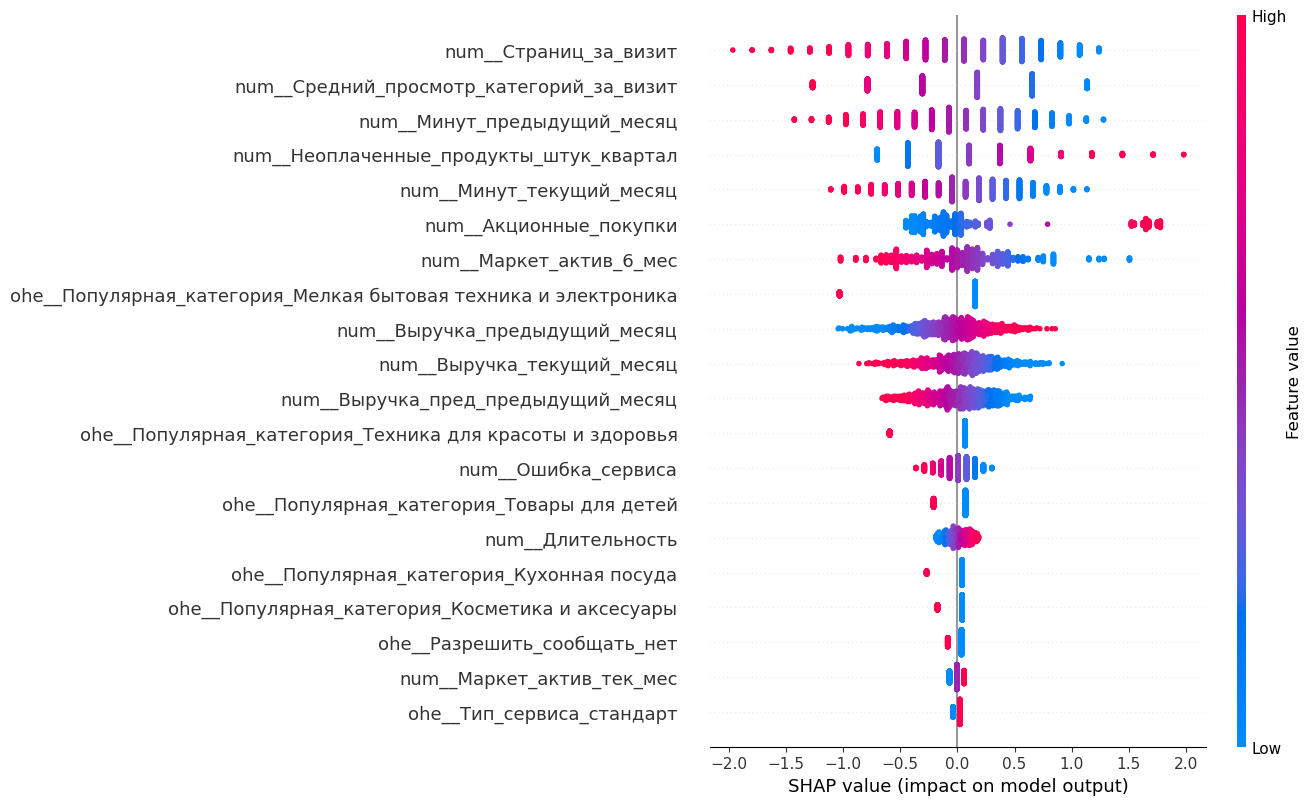

In [90]:
explainer = shap.LinearExplainer(
    randomized_search.best_estimator_.named_steps['models'], X_train_p)
shap_values = explainer(shap_lg)

shap.plots.beeswarm(shap_values, max_display=21)

Построим диаграмму, которая отражает общий вклад признаков в прогнозы модели.

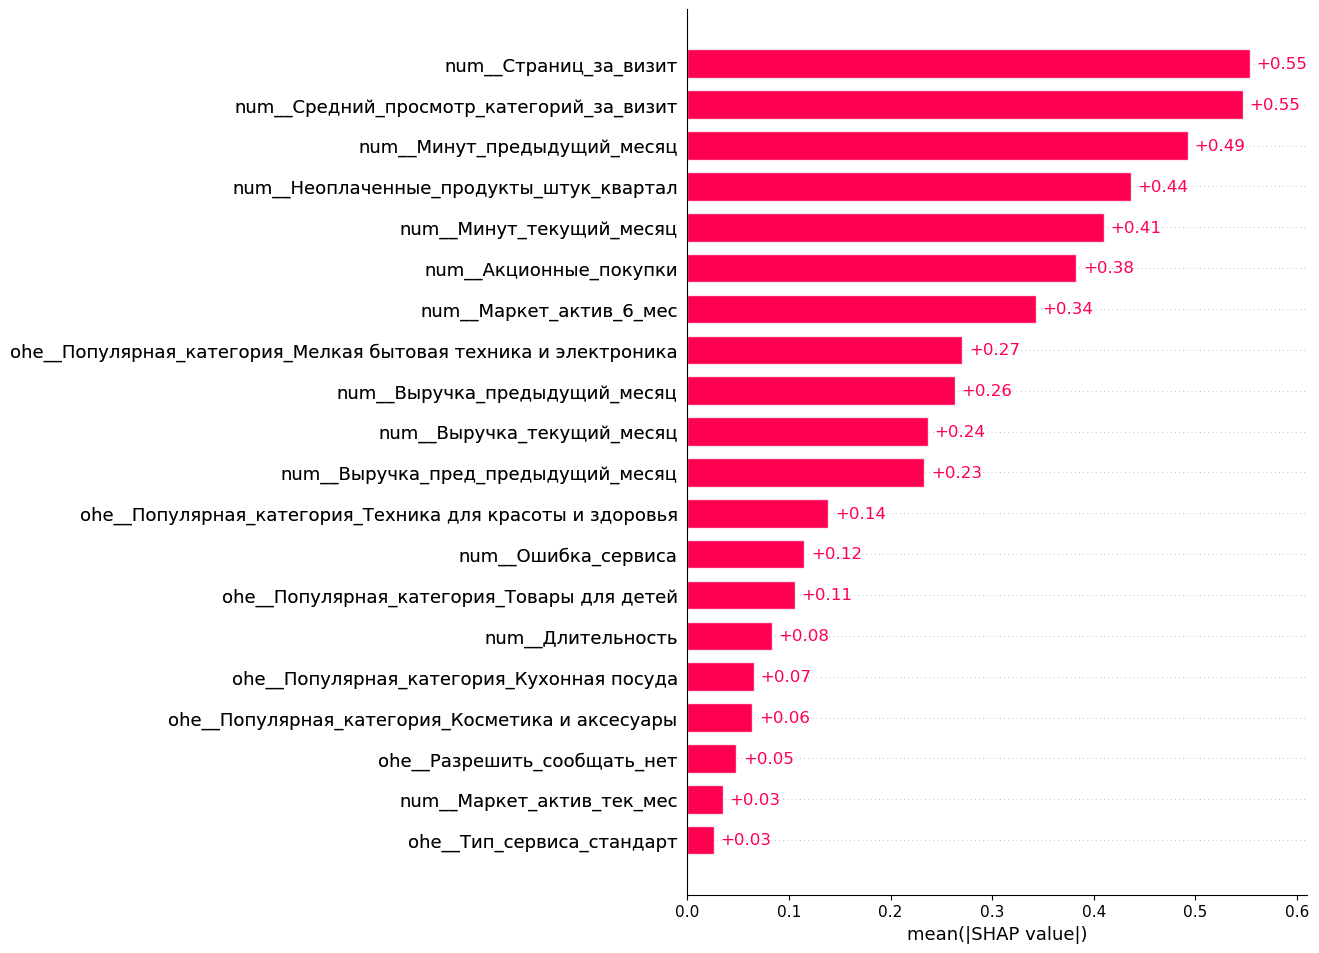

In [91]:
shap.plots.bar(shap_values, max_display=21)

Интерпретируем результаты:
1. Чем больше значения признаков `Страниц_за_визит`, `Средний_просмотр_категорий_за_визит`, `Минут_предыдущий месяц`, `Минут_текущий_месяц`, `Маркет_актив_6_мес`, `Выручка_пред_предыдущий_месяц`, `Выручка_текущий_месяц` тем выше SHAP значение, то есть если у наблюдения высокое значение этого признака, то у него высокая вероятность принадлежать к классу 0, то есть покупательская осталась на прежнем уровне.
2. Чем больше значение признаков `Неоплаченные_продукты_штук_квартал`, `Акционные_покупки`, `Выручка_предыдущий_месяц` тем выше вероятность наблюдения принадлежать к классу 1, то есть покупательская активность снизится.

С точки зрения модели мало значимыми признаками являются `Тип_сервиса`, `Маркет_актив_тек_мес`, `Разрешить сообщать`, `Длительность`. 

С точки зрения модели наиболее важные признаки, которые влияют на покупательскую активность: `Страниц_за_визит`, `Средний_просмотр_категорий_за_визит`, `Минут_предыдущий_месяц`, `Неоплаченные_продукты_штук_месяц` и `Минут_текущий_месяц`. Между этими признаками существуют взаимосвязи, которые модель смогла выявить.

## Сегментация покупателей.

Выделим главный сегмент, в котором будут пользователи с высокой вероятностью снижения покупательской активности, чтобы в дальнейшем работать только с этими пользователями.

Объединим датафреймы `market_total` и `money` и из него выделим сегмент.

In [92]:
market_total_segment = market_total.merge(money, on='id', how='inner')

In [93]:
segment_user_total = (
    market_total_segment[(market_total_segment['Страниц_за_визит'] < 6)
                         & (market_total_segment['Средний_просмотр_категорий_за_визит'] < 8)
                         & (market_total_segment['Минут_предыдущий_месяц'] < 13)
                         & (market_total_segment['Неоплаченные_продукты_штук_квартал'] > 2)
                         & (market_total_segment['Минут_текущий_месяц'] < 13)]
)

Выделим сегмент пользователей, которые покупают только технику.

In [94]:
segment_technique = (
    segment_user_total[(segment_user_total['Популярная_категория'] == 'Техника для красоты и здоровья')
                       | (segment_user_total['Популярная_категория'] == 'Мелкая бытовая техника и электроника')]
)

Выделим сегмент пользователей с максимальной долей покупок по акции.

In [95]:
segment_promotional = segment_user_total[segment_user_total['Акционные_покупки'] > 0.7]

Выделим сегмент пользователей, которые покупают товары из категории `Товары для детей`.

In [96]:
segment_product_child = segment_user_total[segment_user_total['Популярная_категория']
                                           == 'Товары для детей']

### Изучим сегмент, который покупает технику

In [97]:
segment_technique.shape

(15, 19)

In [98]:
segment_technique['Маркет_актив_6_мес'].median()

3.5

Посчитаем среднюю прибыль с этого сегмента, чтобы сравнить его с другими и понять на какой сегмент стоит сделать упор в начале.

In [99]:
segment_technique['Прибыль'].mean()

4.177333333333333

В данной категори 15 пользователей, в среднем маркетинговых коммуникаций 3.5 за каждый месяц, средняя прибыль с сегмента 4.2

Так как есть два вида техники, то посмотрим какую чаще покупают

In [100]:
bar_tech = segment_technique.groupby('Популярная_категория')['id'].count()

Text(0.5, 1.0, 'Категории техники')

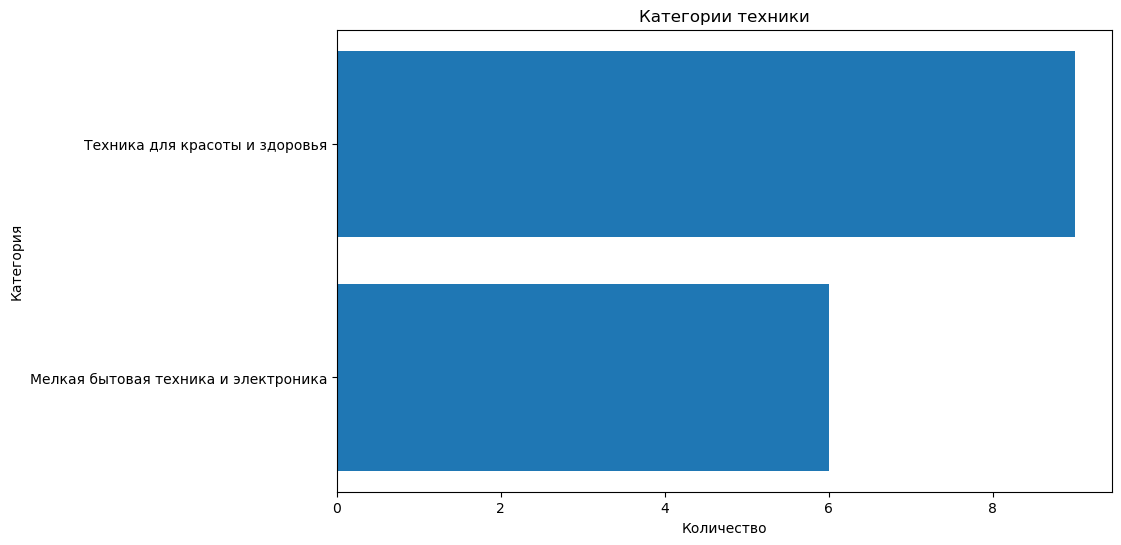

In [101]:
plt.figure(figsize=(10, 6))
plt.barh(bar_tech.index, bar_tech)
plt.xlabel('Количество')
plt.ylabel('Категория')
plt.title('Категории техники');

Более популярная техника для здоровья и красоты. Людей в данной категории немного, что возможно говорит, о том, что довольно выборочно подходят к покупке техники и соответственно редко покупают. Как вариант, стоит предлагать подборки по той технике, которую они приобрели это может их заинтересовать.

### Изучим сегмент с максимальной долей покупок по акциям

In [102]:
segment_promotional.shape

(48, 19)

In [103]:
segment_promotional['Прибыль'].mean()

3.783333333333333

In [104]:
segment_promotional['Маркет_актив_6_мес'].median()

3.7

В данной категори 48 пользователей, в среднем маркетинговых коммуникаций 3.7 за каждый месяц, средняя прибыль с сегмента 3.8

Посмотрим в каких категориях чаще покупают по акциям

In [105]:
bar = segment_promotional.groupby('Популярная_категория')['id'].count()

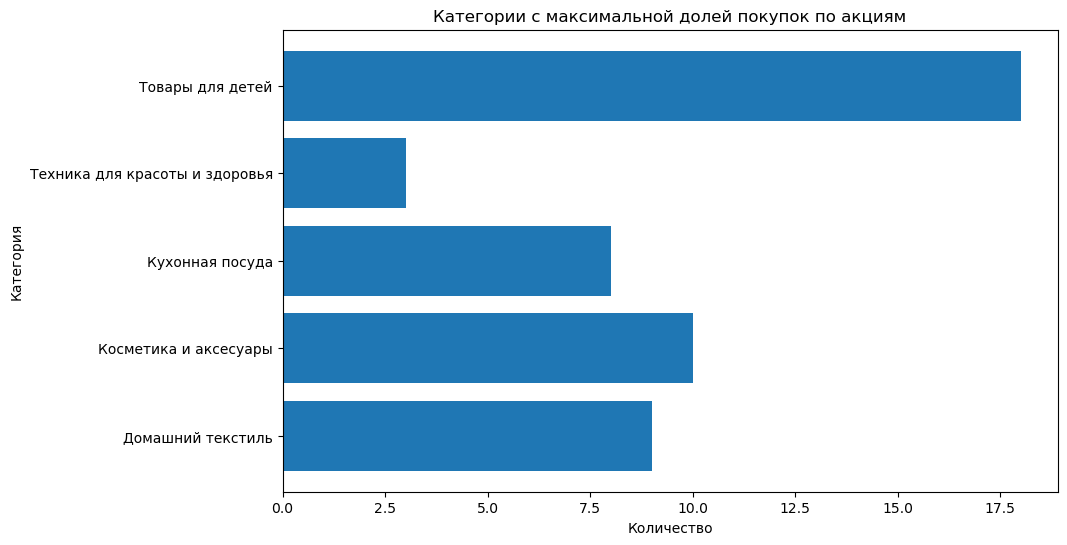

In [106]:
plt.figure(figsize=(10, 6))
plt.barh(bar.index, bar)
plt.xlabel('Количество')
plt.ylabel('Категория')
plt.title('Категории с максимальной долей покупок по акциям');

Возможно, стоит чаще направлять на таких пользователей маркетинговую коммуникацию и стараться предлагать им товары по акциям, но по их любимым категориям, обычно это категория - товары для детей.

### Изучим сегмент - покупают товары из категории `Товары для детей`

In [107]:
segment_product_child.shape

(42, 19)

In [108]:
segment_product_child['Акционные_покупки'].median()

0.39

In [109]:
segment_product_child['Прибыль'].mean()

3.968809523809523

In [110]:
segment_product_child['Маркет_актив_6_мес'].median()

4.0

Посмотрим сколько минут эти пользователи тратили в месяц в среднем и сравним их с временм всех пользователей

In [111]:
segment_product_child['Минут_предыдущий_месяц'].median()

9.0

In [112]:
market_total['Минут_предыдущий_месяц'].median()

13.0

Пользователи меньше времени тратят на использование сервиса, оно и логично у них покупательская активность снизится, так как им требуются товары для детей, то следуем им рекомендовать именно их и что-то из смежных категория, так как у скорее всего у них мало времени, чтобы самим искать товары, так как они заняты, работой, детьми и т.п.
На них также не особо будет влиять скидки на товары, их основное снижение из-за того, что у них нет времени, изучать ассортимент магазина.

## Общий вывод.

Данные были получены из четырех файлов:
- `market_file.csv`;
- `market_money.csv`;
- `market_time.csv`;
- `money.csv`.

Сначала был сделан обзор данных. Само исследование проходило в семь этапов:
- Изучить данные;
- Предобработка данных;
- Исследовательский анализ данных;
- Корреляционный анализ;
- Обучение модели;
- Анализ важности признаков;
- Сегментация покупателей.

**1. Обзор данных.**

В таблице `money` данные склеились из-за неправильного разделителя 

- В таблице `market_file` - 13 столбцов, тип данных - `int`(7), `object`(4), `float`(2). Количество значений в столбцах одинаковое, а значит пропусков нет. Название столбцов `Покупательская активность`, `Тип сервиса`, `Разрешить сообщать` не соответствует стилю.
  
- В таблице `market_money` - 3 столбца, тип данных - `int`(1), `object`(1), `float`(1). Пропусков нет. Название столбцов соответствует стилю.

- В таблице `market_time` - 3 столбца, тип данных - `int`(2), `object`(1). Пропусков нет. В столбце `минут` сделали первую букву прописной для единого стиля всех таблиц

- В таблице `money` - 2 столбца, тип данных - `int`(1), `object`(1). Пропусков нет. Название столбцов соответствует стилю. В столбце `Прибыль` сменили тип данных на `float`.

**2. Прелаброботка данных.**

Переименовали столбцы в датафреймах:
- Переименовали столбцы в таблице `market_file`:

    - `Покупательская активность` на `Покупательская_активность`,
    - `Тип сервиса` на `Тип_сервиса`,
    - `Разрешить сообщать` на `Разрешить_сообщать`.

- Переименовали столбец в таблице `market_time`:

    - `минут` на `Минут`.

Сделали проверку на пропуски - **не обнаружены**.
Сделали проверку на явные дубликаты - **не обнаружены**.

- Сделали проверку на неявные дубликаты:
    - В таблице `market_file` в столбце `Тип_сервиса` заменили `стандартт` на `стандарт`;
    - В таблице `market_money` в столбце `Период` исправили ошибку написания `препредыдущий_месяц` на `пред_предыдущий_месяц`;
    - В таблице `market_time` в столбце `Период` исправили ошибку написания `предыдцщий_месяц` на `предыдущий_месяц`.

Проверили типы данных в датафреймах:
   - Изменили тип данных в таблице `money` в столбце `Прибыль` с `object` на `float`.
   
**3. Исследовательский анализ данных.**

1. На маркете преобладают пользователи со стандартным уровнем `71.1%`.
2. В маркете `74%` пользователей разрешила присылать покупателю дополнительные предложения о товаре.
3. Категории на маркете по посещаемости расположились в следующем виде:
    - Товары для детей - `25.4%`.
    - Домашний текстиль - `19.3%`.
    - Косметика и аксессуары - `17.2%.
    - Техника для красоты и здоровья - `14.2`
    - Мелкая бытовая техника и электроника - `13.4%`
    - Кухонная посуда - `10.6%`.
4. Среди `61.7%` пользователей маркета сохранилась прежняя покупательская активность.
5. В таблице `market_file` было найдено несколько выбросов по количественным переменным, но аномальными они не являются.
6. Несмотря на то, что пользователей премиум меньше их значения практически похожи со стандартным уровнем по описательной статистике.
7. Можно сказать, что покупательская активность не зависит от уровня сервиса. Что и у премиум пользователей, что и у стандартных преобладает `прежний уровень`.
8. Уровень сервиса не зависит от разрешения рассылок.
9. Хоть пользователей стандартного уровня больше, можно сказать, что в среднем маркетинг компании направлен на всех клиентов.
10. График зависимости уровня сервиса от длительности имеет ненормальное распределение. Видно, что премиум пользователи уже давно зарегистрировались на маркете от 800 дней и более.
11. График зависимости уровня сервиса от сбоев имеет нормальное распределение смещенное вправо.
12. График зависимости уровня сервиса от посещения страниц имеет нормальное распределение смещенное вправо. Также можно заметить, что большое количество страниц посещают чаще премиум пользователи.
13. Пользователи стандартного уровня чаще не оплачивает товары, что и логично их просто больше, также можно заметить, что, начиная от 8 товаров пользователи уровней сравниваются, что может свидетельствовать, что премиум пользователи чаще не оплачивают товары.
14. Пользователи обоих уровней одинаково покупают по акциям.
15. Информация о выручке за три периода имеет одинаковое количество - `33.3%`.
16. В таблице `market_money` по столбцу выручки было найдено аномальное значение, так как за предыдущие периоды максимальная выручка от пользователя была `6077`, а за текущий `106862.2` при этом это единственное такое крупное значение, поэтому оно было удалено.
17. Посмотрели на пользователей выручка с которых равна нулю. Таких пользователей оказалось 3 и за два предыдущих периода с них маркет не имел выручки, такие клиенты могли ничего не покупать, а зарегистрировались, для того, чтобы возможно получать интересные предложения, которые их заинтересуют для покупки, но по условию задачи клиента эти данные нам не нужны.
18. С каждым периодом выручка маркета растет.
19. В таблице `market_time` в столбце с информацией по периодам в процентном соотношении одинаковая - `50%`, так как в данной таблице всего 2 периода.
20. По времени проведенное на сайте текущий период немного уступает предыдущему.
21. В таблице `money` нет аномально больших значений, а также пользователей с нулевой выручкой.

**4. Корреляционный анализ.**

Нашем целевым признаком является `Покупательская_активность`.

Целевой признак имеет мультиколлинеарность с `id` из-за этого могут быть утечки данных, но так как этот столбец содержит только id пользователей, то при обучении модели он не будет использоваться.

1. Наш целевой признак имеет сильную взаимосвязь с признаками `Страниц_за_визит` = 0.75 и `Минут_предыдущий_месяц` = 0.69.
2. С признаками `Минут_текущий_месяц`, `Выручка_пред_предыдущий_месяц`, `Неоплаченные_продукты_штук_квартал`, `Средний_просмотр_категорий_за_визит`, `Акицонные_покупки` и `Маркет_актив_6_мес` имеется хорошая взаимосвязь.
3. С признаками `Тип_сервиса`, `Длительность`, `Ошибка_сервиса`, `Выручка_текущий_месяц`, `Выручка_предыдущий_месяц` и `Популярная_категория` целевой признак имеет слабую взаимосвязь.
4. С признаками `Маркет_актив_тек_мес` и `Разрешить_сообщать` целевой признак не имеет взаимосвязи.

Мультиколлинеарность между целевым и входными признаками не наблюдается.

**5. Обучение модели.**

Необходимо было обучить модель, чтобы она могла предсказать наш целевой признак `Покупательская_активность`.

Для упрощения расчетов воспользовались пайпланами, чтобы обучить сразу несколько моделей и выбрать из них лучшую.

Для обучения воспользовались 4 моделями `LogisticRegression`, `SVC`, `KNeighborsClassifier` и `DecisionTreeClassifier` и для них подбирали гиперпараметры при помощи `RandomizedSeachCV`. Также кодировали признаки несколькими способами `StandardScaler`, `MinMaxScaler` - для количественных признаков. `OneHotEnconder`, `OrdinalEnconder` - для категориальных признаков.

У `LogisticRegression` подбирали признак:
- C, который регулирует силу регуляризации.
В качестве регуляризации взяли L1-регуряризация.

У `SVC` с ядром `rbf` подбирали признак:
- gamma

У `KNeighborsClassifier` подбирали признак:
- n_neighbors

У `DecisionTreeClassifier` подбирали признаки:
- max_depth
- max_features

Оценивали модель по метрике `ROC-AUC`, так как эта метрика классификации учитывает работу модели при всех возможных значениях порогов в отличие от других.

В результате получаем, что лучшая модель это `LogisticRegression` с параметром `C = 4` этот параметр отвечает за силу регуляризации, то есть, чтобы избежать переобучения модели. 

Метрика на тренировочной выборке: `0.895`

Метрика на тестовой выборке: `0.916`

Как видно из метрики на тестовых данных модель показала себе чуточку лучше, но в целом результат одинаковый, а значит модель не переобучилась.

**6. Анализ важности признаков.**

В результате анализа важности были сделаны следующие выводы:
1. Чем больше значения признаков `Страниц_за_визит`, `Средний_просмотр_категорий_за_визит`, `Минут_предыдущий месяц`, `Минут_текущий_месяц`, `Маркет_актив_6_мес`, `Выручка_пред_предыдущий_месяц`, `Выручка_текущий_месяц` тем выше SHAP значение, то есть если у наблюдения высокое значение этого признака, то у него высокая вероятность принадлежать к классу 0, то есть покупательская осталась на прежнем уровне.
2. Чем больше значение признаков `Неоплаченные_продукты_штук_квартал`, `Акционные_покупки`, `Выручка_предыдущий_месяц` тем выше вероятность наблюдения принадлежать к классу 1, то есть покупательская активность снизится.

Мало значимыми признаками являются `Тип_сервиса`, `Маркет_актив_тек_мес`, `Разрешить сообщать`, `Длительность`. То есть можно сказать, что каким бы не был уровень сервиса то он не повлияет на активность, и если у компании маркетинговая активность направлена на привлечение сделать больше премиум пользователей, то на это можно не тратить средства. 
Также можно сказать, что маркетинговая активность в одном месяце не будет влиять на активность, можно предположить, что она имеет накопительный эффект, так как маркетинг за 6 месяцев уже является весомым признаком.

Также не стоит делать акцент на  том, можно ли присылать покупателю дополнительные предложения о товаре  это ни как не влияет на покупательскую активность.

Так же не стоит делать акцент на времени регистрации пользователей.

Сильнее всего на покупательскую активность влияют такие признаки, как `Страниц_за_визит`, `Средний_просмотр_категорий_за_визит`, `Минут_предыдущий_месяц`, `Неоплаченные_продукты_штук_месяц` и `Минут_текущий_месяц`.

Можно сделать вывод, что необходимо делать акцент на людях, которые часто пользуются маркетом, то есть просматривают страницы, категории. И также стоит обратить внимание неоплаченные товары, чем их больше тем больше шанс, что снизится активность.

**7. Сегментация покупателей.**

Среди всех пользователей выделили 3 сегмента:
- Пользователи, которые покупают товары из категории `Товары для детей`. 
- Пользователи с максимальной долей покупок по акции. 
- Пользователи, которые покупают только технику.

Выбрали эти сегменты, так как у этих пользователей высокая вероятность снижения покупательской активности.

По пользователям, которые покупают технику можно сказать следующие. Всего таких пользователей `15`, медианная маркетинговая активность за 6 месяцев `3.5`, медианная прибыль с таких пользователей `4.2`.

Более популярная техника для здоровья и красоты. Людей в данной категории немного, что возможно говорит, о том, что довольно выборочно подходят к покупке техники и соответственно редко покупают. Как вариант, стоит предлагать подборки по той технике, которую они приобрели это может их заинтересовать. Например, различные аксессуар к той технике, которую они купили.

По пользователям с максимальной долей покупок по акциям, следующие результаты. Всего таких пользователей `48`, медианная маркетинговая активность за 6 месяцев `3.7`, медианная прибыль `3.8`

Возможно, стоит чаще направлять на таких пользователей маркетинговую коммуникацию и стараться предлагать им товары по акциям, но по их любимым категориям, обычно это категория - товары для детей. Также возможно стоит улучшить сами акции, например, предлагать необходимый им товар, а к нему в придачу еще один, но цена из-за этого будет выше, но может сыграть фактор акции.

По пользователям, которые покупают товары для детей. Всего таких пользователей `42`, медианная маркетинговая активность за 6 месяцев `4`, медианная прибыль с таких пользователей `3.9`, медианное значение по акционным покупкам `0.39`.

Пользователи меньше времени тратят на использование сервиса, оно и логично у них покупательская активность снизится, так как им требуются товары для детей, то следуем им рекомендовать именно их и что-то из смежных категория, так как у скорее всего у них мало времени, чтобы самим искать товары, так как они заняты, работой, детьми и т.п.
На них также не особо будет влиять скидки на товары, их основное снижение из-за того, что у них нет времени, изучать ассортимент магазина.

**Вывод.**

По результатам исследования была обучена модель, которая может предсказывать снижение покупательской активности. 

Покупательская активность снижается у тех, кто меньше пользуется маркетом, хороший пример - это сегмент пользователей, которые покупают товары для детей. Они мало пользуются приложением из-за нехватки времени и покупают только необходимое. Введение персонализированных предложений поможет увеличить их активность, так как им не надо будет тратить время на поиск товара.

Можно посоветовать сделать упор в начале на сегмент пользователей, которые покупают по акциям, с них прибыль больше, чтобы удерживать их активность, необходимо предлагать товары сделать подборку акционных товаров или же изменить подход к самим акциям и разбавить такими методами, как 2 по цене 1 и т.п., если такого нет. Так как такие пользователи готовы покупать акциям не зависимо от категории.

Для увеличения покупательской активности пользователей, которые покупают технику, необходимо предлагать аксессуары к технике, которую они уже купили, так как покупка техники является довольно крупной в денежном плане покупкой, то следующая такая покупка быстро не случится и поэтому аксессуары к технике позволят держать на уровне активность.